In [180]:
#Authors Tanmay Sawaji(tsawaji) and Ruchik Dama(rdama)

In [181]:
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import matplotlib.pyplot as plt
import numpy as np
#from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

In [182]:
train_ds = dsets.MNIST(root='MNIST_data/',train=True,transform=transforms.ToTensor(),download=True)
test = dsets.MNIST(root='MNIST_data/',train=False,transform=transforms.ToTensor(),download=True)
#Creating a validations set which is 10% of the Train Set
indices = np.arange(60000)
validate  = torch.utils.data.Subset(train_ds, indices[:6000])
train=torch.utils.data.Subset(train_ds, indices[6000:])

In [183]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validate, batch_size=batch_size, shuffle=True)
print('The training dataset:\t',train)
print('\nThe testing dataset:\t',test)
print('\nThe validate dataset:\t',validate)

The training dataset:	 <torch.utils.data.dataset.Subset object at 0x7fe6ee4df250>

The testing dataset:	 Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data/
    Split: Test
    StandardTransform
Transform: ToTensor()

The validate dataset:	 <torch.utils.data.dataset.Subset object at 0x7fe6eebaa310>


In [184]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


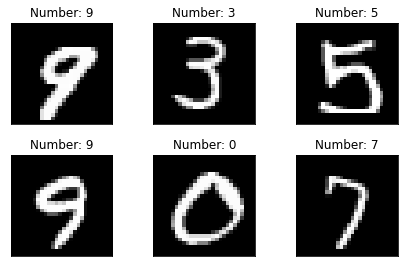

In [185]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')
  plt.title("Number: {}".format(labels[i]))
  plt.xticks([])
  plt.yticks([])

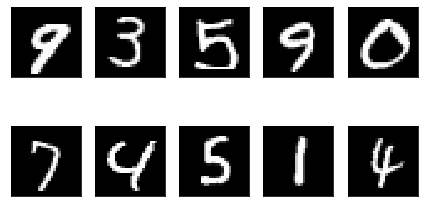

In [186]:
fig,ax=plt.subplots(2,5,True,True)
ax=ax.flatten()
for i in range(10):
  ax[i].imshow(images[i].numpy().squeeze(), cmap='gray', interpolation='none')

    
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [187]:
class CNN(torch.nn.Module,):
    def __init__(self,p=0.0):
            super(CNN, self).__init__()

            self.layer=torch.nn.Sequential(
            # outputOfEachConvLayer = [(in_channel + 2*padding - kernel_size) / stride] + 1
            torch.nn.Conv2d(1, 12, kernel_size=3, stride=1, padding=1),
            #torch.nn.init.xavier_normal_(self.conv1.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(p=p),
            #In First Layer the output would be (for first layer the we take in-channel as 28 beacause the images is 28x28 pixel)
            # so, [(28 + 2*1 - 3)/1] + 1 = 28.
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # as kernel_size in maxpool is 2 ,  we have to divide it by 2 28/2=14.
            #Second Layer
            torch.nn.Conv2d(12, 24, kernel_size=3, stride=1, padding=1),
            #torch.nn.init.xavier_normal_(self.torch.nn.Conv2d.weight),
            #torch.nn.init.zeros_(self.torch.nn.Conv2d.bias),
            # After the second convolutional layer the output of this layer is:
            # [(14 + 2*1 - 3)/1] + 1 = 14.
            torch.nn.ReLU(inplace=True),
            torch.nn.Dropout(p=p),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Since we applied maxpooling with kernel_size=2 we have to divide by 2, so we get
            # 14 / 2 = 7
            
            )
    
            
            # Linear layer
            self.linear_layers = torch.nn.Sequential(
                    # We have the output_channel=24 of our second conv layer, and 7*7 is derived by the formula 
                    # which is the output of each convolutional layer
                    torch.nn.Linear(in_features=24*7*7, out_features=64),          
                    torch.nn.ReLU(),
                    torch.nn.Dropout(p=p),
                    torch.nn.Linear(64, 10), 
                    #torch.nn.init.xavier_normal_(self.torch.nn.Linear.weight),
                    #torch.nn.init.zeros_(self.torch.nn.Linear.bias),
            )
    
    # Defining forward
    def forward(self, x):
        x = self.layer(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x
#Glorot Initialization    
def initialize_weights(m):
      if isinstance(m, torch.nn.Conv2d):
          torch.nn.init.xavier_normal_(m.weight)
          if m.bias is not None:
             torch.nn.init.zeros_(m.bias)
      elif isinstance(m, torch.nn.Linear):
          torch.nn.init.xavier_normal_(m.weight)
          torch.nn.init.zeros_(m.bias)


# instantiate CNN model
model1 = CNN(p=0.25)
model1.apply(initialize_weights)
print(model1)

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.25, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.25, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [188]:
model2 = CNN(p=0.5)
model2.apply(initialize_weights)

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.5, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [189]:
model3 = CNN(p=0.75)
model3.apply(initialize_weights)

CNN(
  (layer): Sequential(
    (0): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.75, inplace=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.75, inplace=False)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=1176, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.75, inplace=False)
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [190]:
learning_rate = 0.05
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer = torch.optim.SGD(params=model1.parameters(), lr=learning_rate,momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
optimizer1 = torch.optim.SGD(params=model1.parameters(), lr=0.001,momentum=0.9)
scheduler1 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Training Model1 the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 25
Epoch=  1 , batch =  0 , cost =  2.3021926879882812 , accuracy =  0.09375
Epoch=  1 , batch =  625 , cost =  0.5271559953689575 , accuracy =  0.8125
Epoch=  1 , batch =  1250 , cost =  0.0750364139676094 , accuracy =  1.0
Validate Epoch=  1 , batch =  0 , cost =  0.2877160310745239 , accuracy =  1.0
Epoch:  1  averaged cost =  0.34272894263267517  train accuracy =  0.8979006220379147


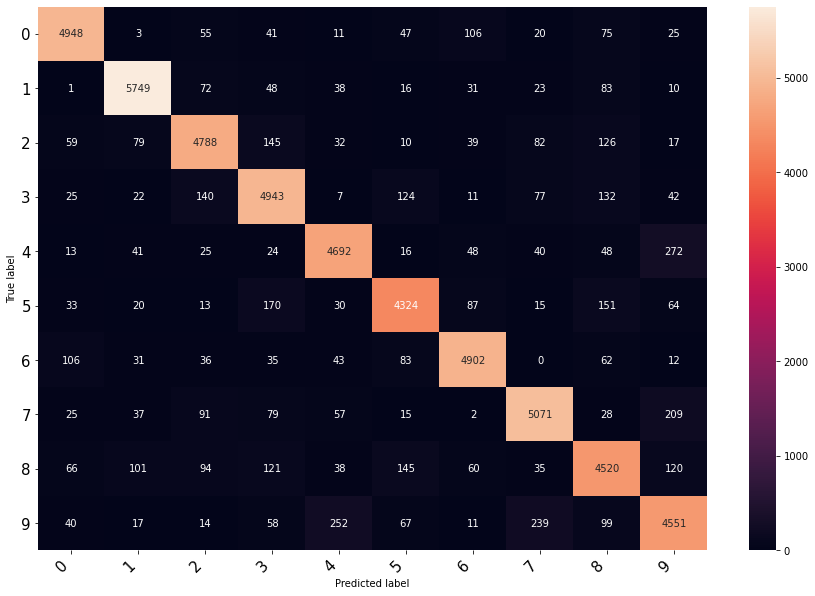

Epoch=  2 , batch =  0 , cost =  0.15458551049232483 , accuracy =  0.96875
Epoch=  2 , batch =  625 , cost =  0.11656676232814789 , accuracy =  0.9375
Epoch=  2 , batch =  1250 , cost =  0.14841079711914062 , accuracy =  0.96875
Validate Epoch=  2 , batch =  0 , cost =  0.000964927370660007 , accuracy =  1.0
Epoch:  2  averaged cost =  0.07926866412162781  train accuracy =  0.9376018216824644


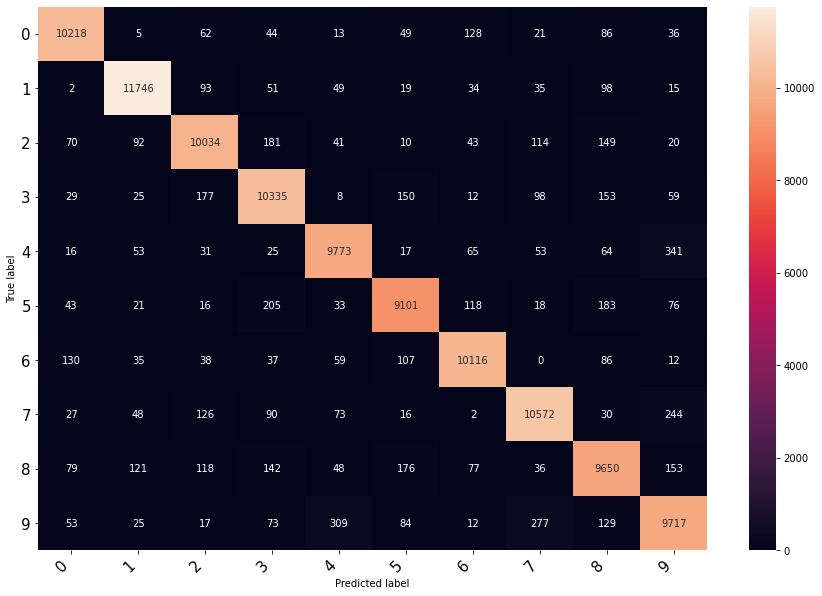

Epoch=  3 , batch =  0 , cost =  0.19825774431228638 , accuracy =  0.96875
Epoch=  3 , batch =  625 , cost =  0.10462143272161484 , accuracy =  0.9375
Epoch=  3 , batch =  1250 , cost =  0.1653798222541809 , accuracy =  0.96875
Validate Epoch=  3 , batch =  0 , cost =  0.014639216475188732 , accuracy =  0.96875
Epoch:  3  averaged cost =  0.057636115700006485  train accuracy =  0.9527423973143759


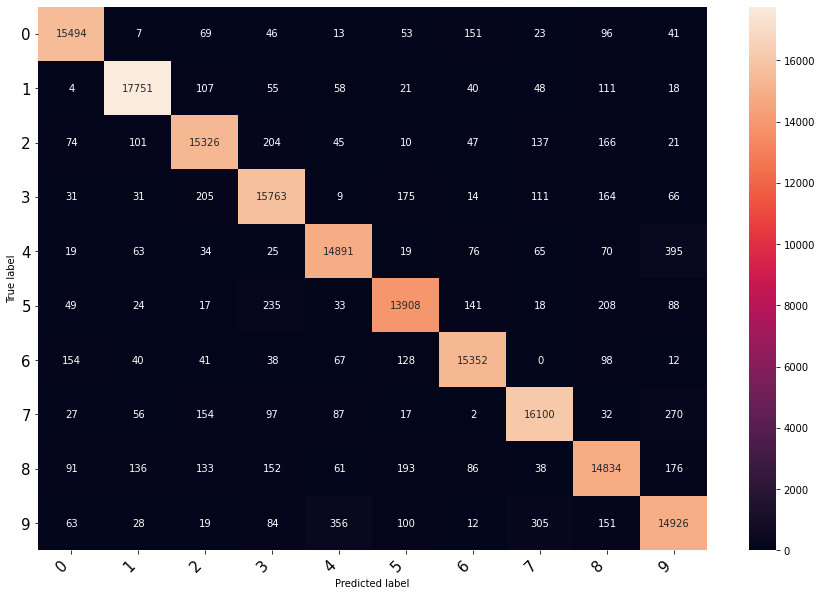

Epoch=  4 , batch =  0 , cost =  0.08158544450998306 , accuracy =  0.9375
Epoch=  4 , batch =  625 , cost =  0.4721977412700653 , accuracy =  0.9375
Epoch=  4 , batch =  1250 , cost =  0.3390154242515564 , accuracy =  0.9375
Validate Epoch=  4 , batch =  0 , cost =  0.002913309494033456 , accuracy =  0.96875
Epoch:  4  averaged cost =  0.05142439529299736  train accuracy =  0.9608264218009479


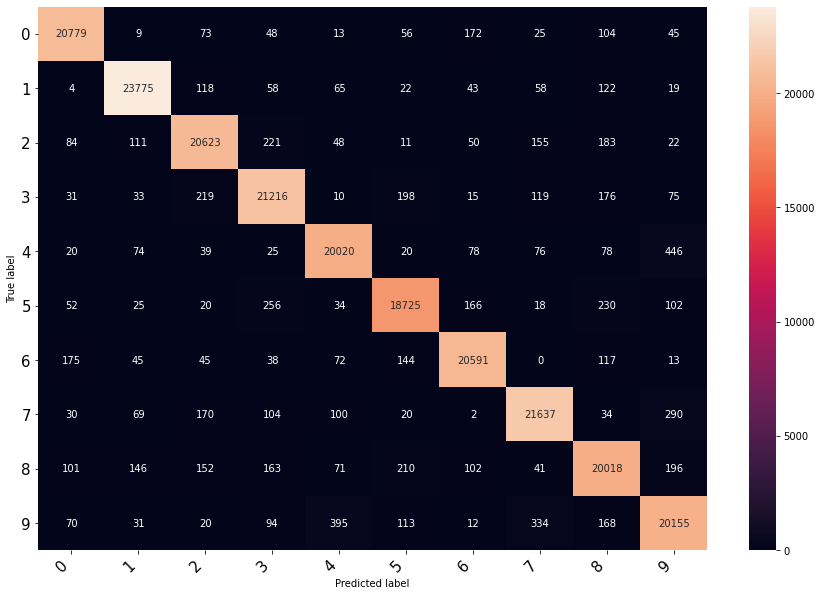

Epoch=  5 , batch =  0 , cost =  0.021275954321026802 , accuracy =  1.0
Epoch=  5 , batch =  625 , cost =  0.059563666582107544 , accuracy =  0.96875
Epoch=  5 , batch =  1250 , cost =  0.006020017899572849 , accuracy =  1.0
Validate Epoch=  5 , batch =  0 , cost =  0.5251160860061646 , accuracy =  1.0
Epoch:  5  averaged cost =  0.04494404047727585  train accuracy =  0.9659804502369668


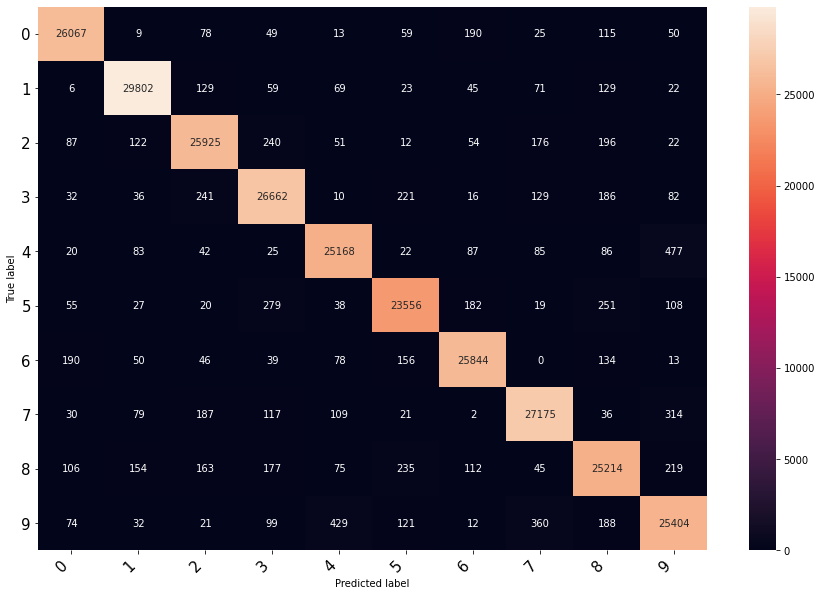

Epoch=  6 , batch =  0 , cost =  0.05817596614360809 , accuracy =  0.96875
Epoch=  6 , batch =  625 , cost =  0.0033296854235231876 , accuracy =  1.0
Epoch=  6 , batch =  1250 , cost =  0.0007468026597052813 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  0.22499626874923706 , accuracy =  0.9375
Epoch:  6  averaged cost =  0.041346874088048935  train accuracy =  0.9695861719984202


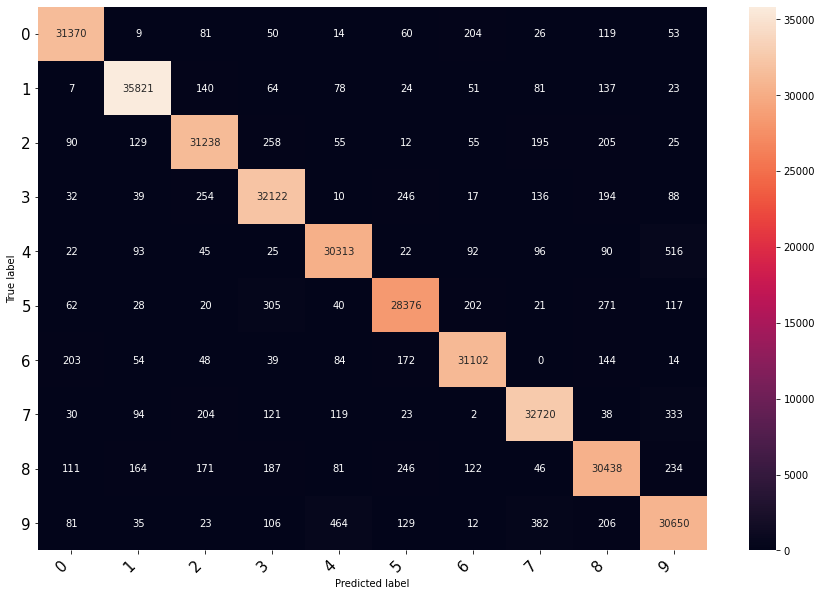

Epoch=  7 , batch =  0 , cost =  0.02256740815937519 , accuracy =  1.0
Epoch=  7 , batch =  625 , cost =  0.0017675270792096853 , accuracy =  1.0
Epoch=  7 , batch =  1250 , cost =  0.1778329610824585 , accuracy =  0.9375
Validate Epoch=  7 , batch =  0 , cost =  2.0508392481133342e-05 , accuracy =  1.0
Epoch:  7  averaged cost =  0.035432323813438416  train accuracy =  0.972500211577522


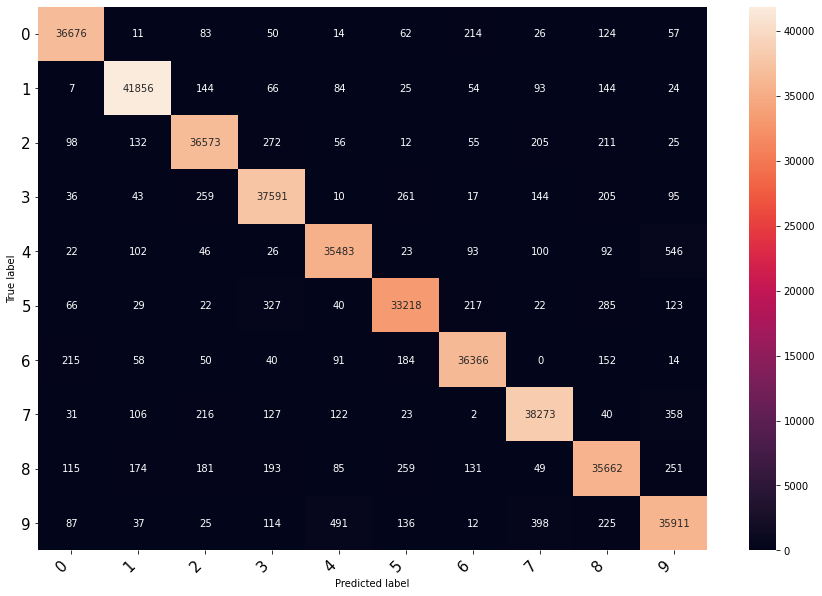

Epoch=  8 , batch =  0 , cost =  0.1491672247648239 , accuracy =  0.96875
Epoch=  8 , batch =  625 , cost =  0.006548780482262373 , accuracy =  1.0
Epoch=  8 , batch =  1250 , cost =  0.010581182315945625 , accuracy =  1.0
Validate Epoch=  8 , batch =  0 , cost =  0.011142050847411156 , accuracy =  1.0
Epoch:  8  averaged cost =  0.03514755889773369  train accuracy =  0.9747065684241706


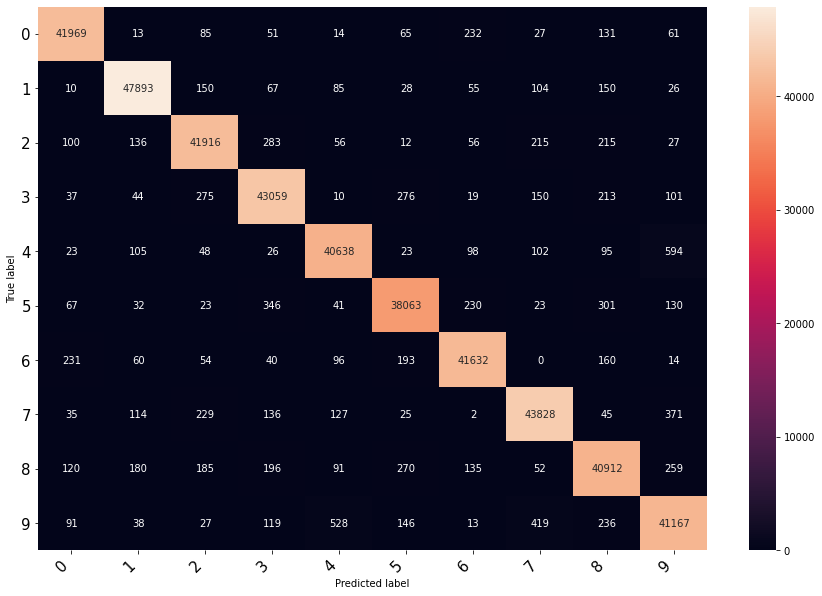

Epoch=  9 , batch =  0 , cost =  0.03563592955470085 , accuracy =  0.96875
Epoch=  9 , batch =  625 , cost =  0.0001683128357399255 , accuracy =  1.0
Epoch=  9 , batch =  1250 , cost =  0.0001025325182126835 , accuracy =  1.0
Validate Epoch=  9 , batch =  0 , cost =  1.9033430362469517e-05 , accuracy =  0.96875
Epoch:  9  averaged cost =  0.04478388652205467  train accuracy =  0.9761634412848867


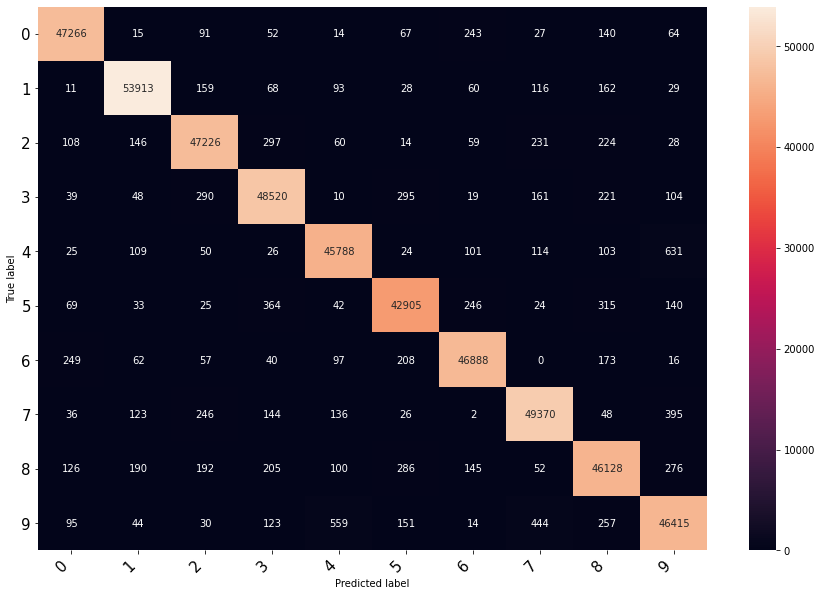

Epoch=  10 , batch =  0 , cost =  0.010141795501112938 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.03145124018192291 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  0.04863487184047699 , accuracy =  0.96875
Validate Epoch=  10 , batch =  0 , cost =  0.16592487692832947 , accuracy =  0.96875
Epoch:  10  averaged cost =  0.04454652965068817  train accuracy =  0.9773178317535545


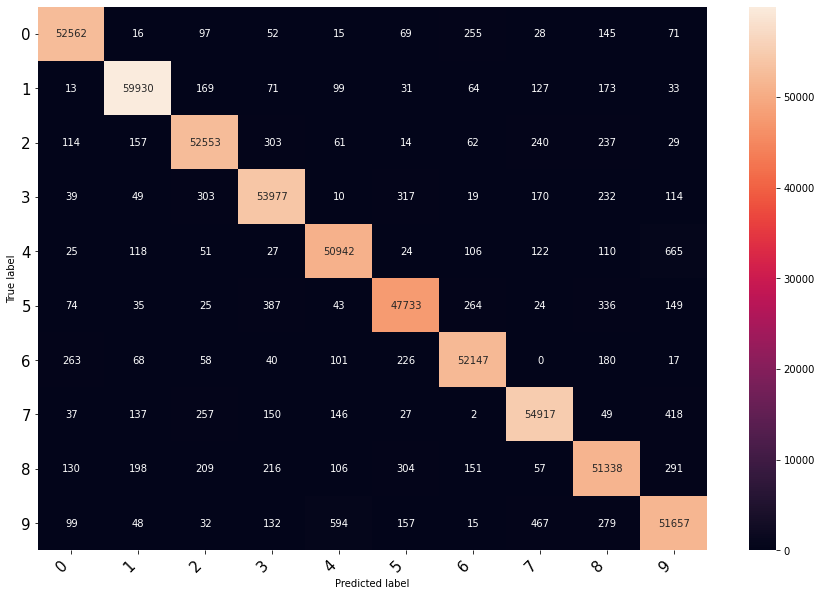

Epoch=  11 , batch =  0 , cost =  0.012135311961174011 , accuracy =  1.0
Epoch=  11 , batch =  625 , cost =  0.00045519310515373945 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  0.0010007149539887905 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  8.043424895731732e-05 , accuracy =  0.96875
Epoch:  11  averaged cost =  0.01651819236576557  train accuracy =  0.9789405832615252


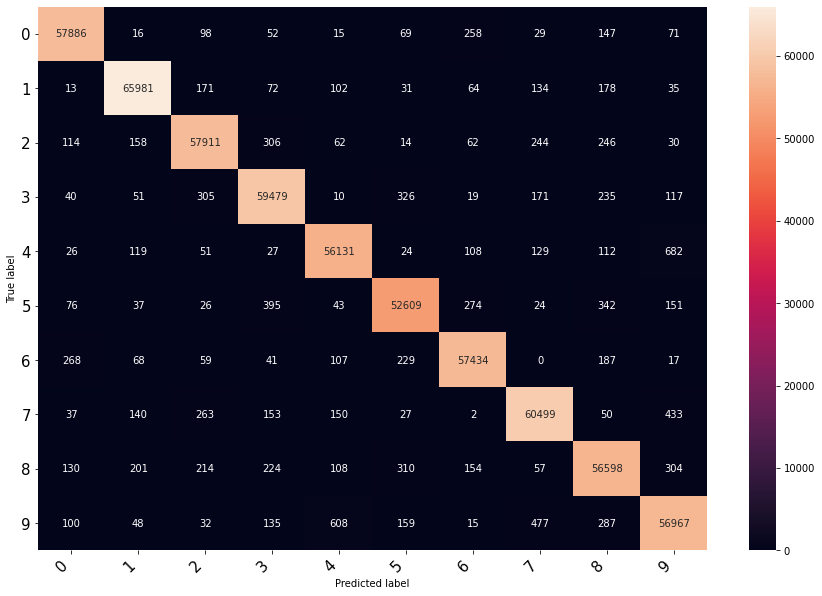

Epoch=  12 , batch =  0 , cost =  0.013682381249964237 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  1.4247585568227805e-05 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.0017513056518509984 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  0.04540343955159187 , accuracy =  1.0
Epoch:  12  averaged cost =  0.00676154438406229  train accuracy =  0.980524289099526


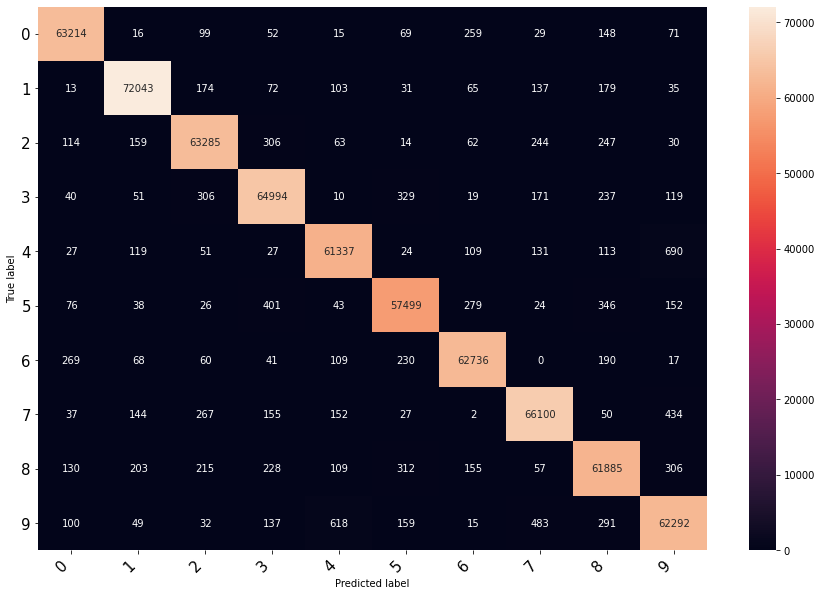

Epoch=  13 , batch =  0 , cost =  2.5753683075890876e-05 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  0.00015163715579546988 , accuracy =  1.0
Epoch=  13 , batch =  1250 , cost =  0.0004806220531463623 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  0.011160396039485931 , accuracy =  0.96875
Epoch:  13  averaged cost =  0.004508953541517258  train accuracy =  0.981931279620853


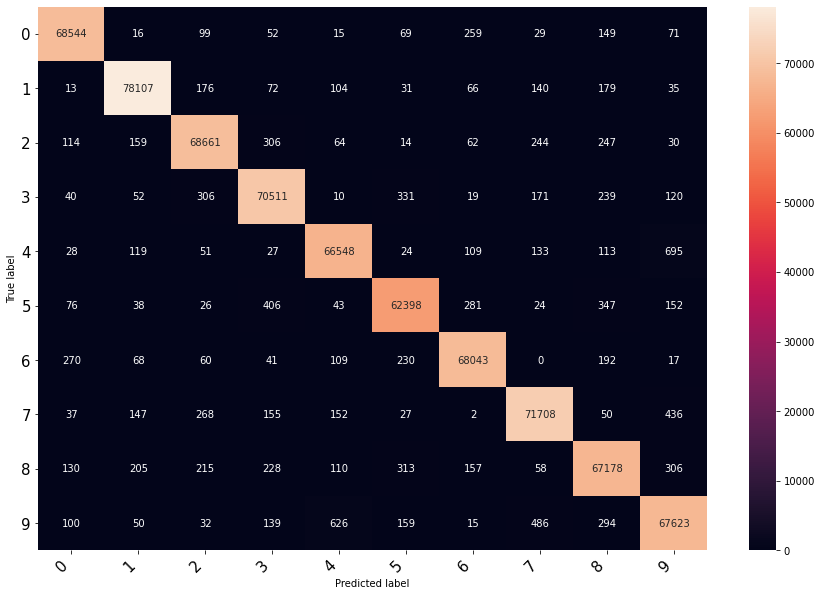

Epoch=  14 , batch =  0 , cost =  1.2895260624645744e-05 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  5.132834121468477e-05 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  1.9593040633480996e-05 , accuracy =  1.0
Validate Epoch=  14 , batch =  0 , cost =  0.00015704086399637163 , accuracy =  1.0
Epoch:  14  averaged cost =  0.0034702804405242205  train accuracy =  0.9831663634055517


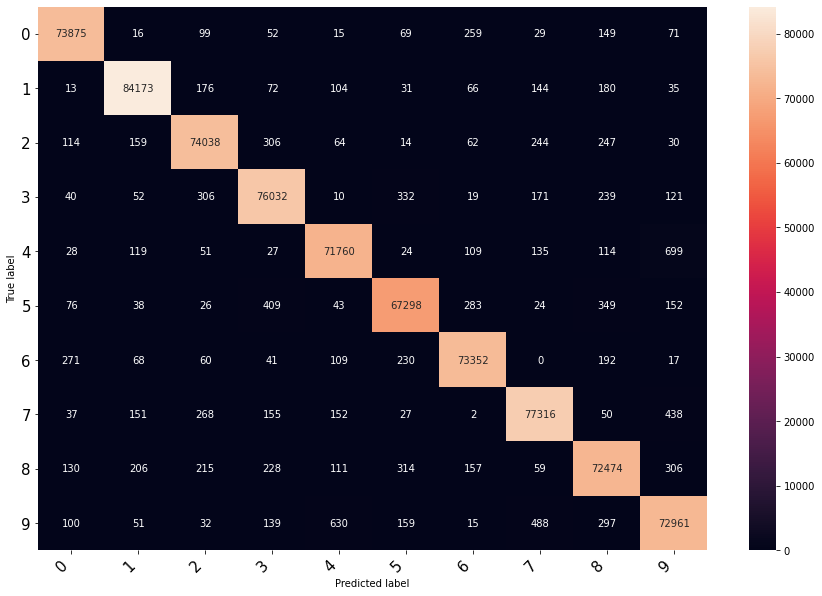

Epoch=  15 , batch =  0 , cost =  1.9743976054087398e-07 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  0.04473675787448883 , accuracy =  0.96875
Epoch=  15 , batch =  1250 , cost =  3.538958935678238e-06 , accuracy =  1.0
Validate Epoch=  15 , batch =  0 , cost =  9.3131950507086e-07 , accuracy =  0.96875
Epoch:  15  averaged cost =  0.0027722406666725874  train accuracy =  0.9842454087677726


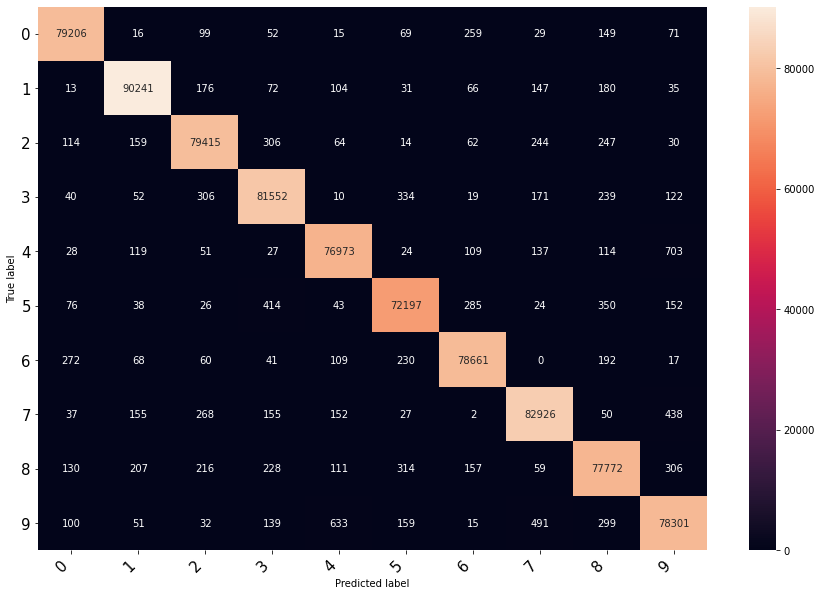

Epoch=  16 , batch =  0 , cost =  0.00041402189526706934 , accuracy =  1.0
Epoch=  16 , batch =  625 , cost =  0.0014541734708473086 , accuracy =  1.0
Epoch=  16 , batch =  1250 , cost =  5.624990535579855e-06 , accuracy =  1.0
Validate Epoch=  16 , batch =  0 , cost =  4.172201442997903e-06 , accuracy =  1.0
Epoch:  16  averaged cost =  0.002299289684742689  train accuracy =  0.9852023011700237


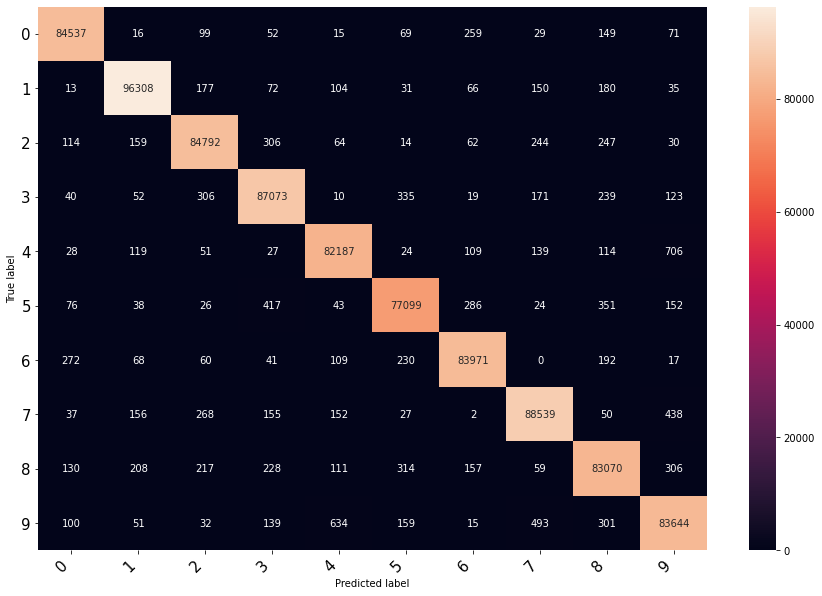

Epoch=  17 , batch =  0 , cost =  0.00031042980845086277 , accuracy =  1.0
Epoch=  17 , batch =  625 , cost =  1.538951983093284e-05 , accuracy =  1.0
Epoch=  17 , batch =  1250 , cost =  0.0028323836158961058 , accuracy =  1.0
Validate Epoch=  17 , batch =  0 , cost =  0.0 , accuracy =  1.0
Epoch:  17  averaged cost =  0.0019529445562511683  train accuracy =  0.9860466179955395


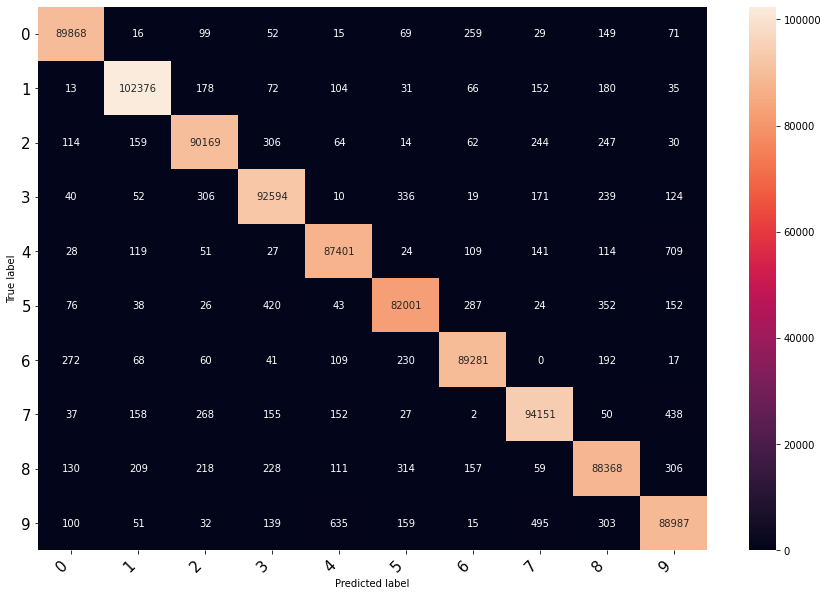

Epoch=  18 , batch =  0 , cost =  0.00011657310096779838 , accuracy =  1.0
Epoch=  18 , batch =  625 , cost =  0.000330923474393785 , accuracy =  1.0
Epoch=  18 , batch =  1250 , cost =  0.006755360867828131 , accuracy =  1.0
Validate Epoch=  18 , batch =  0 , cost =  2.9802318834981634e-08 , accuracy =  0.96875
Epoch:  18  averaged cost =  0.0017049689777195454  train accuracy =  0.9868022643496577


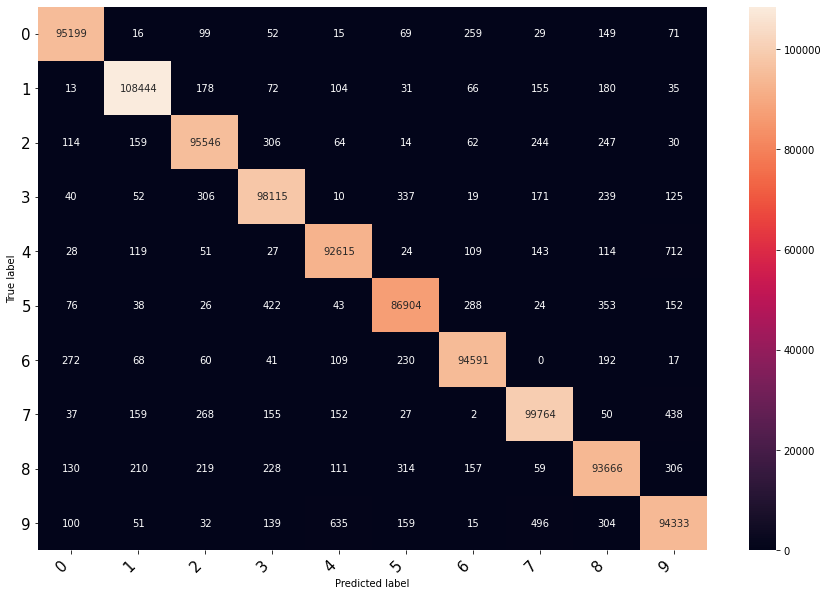

Epoch=  19 , batch =  0 , cost =  2.3400974896503612e-05 , accuracy =  1.0
Epoch=  19 , batch =  625 , cost =  8.466749932267703e-06 , accuracy =  1.0
Epoch=  19 , batch =  1250 , cost =  2.9727082164754393e-06 , accuracy =  1.0
Validate Epoch=  19 , batch =  0 , cost =  6.159425538498908e-05 , accuracy =  1.0
Epoch:  19  averaged cost =  0.0014944594586268067  train accuracy =  0.9874842152032925


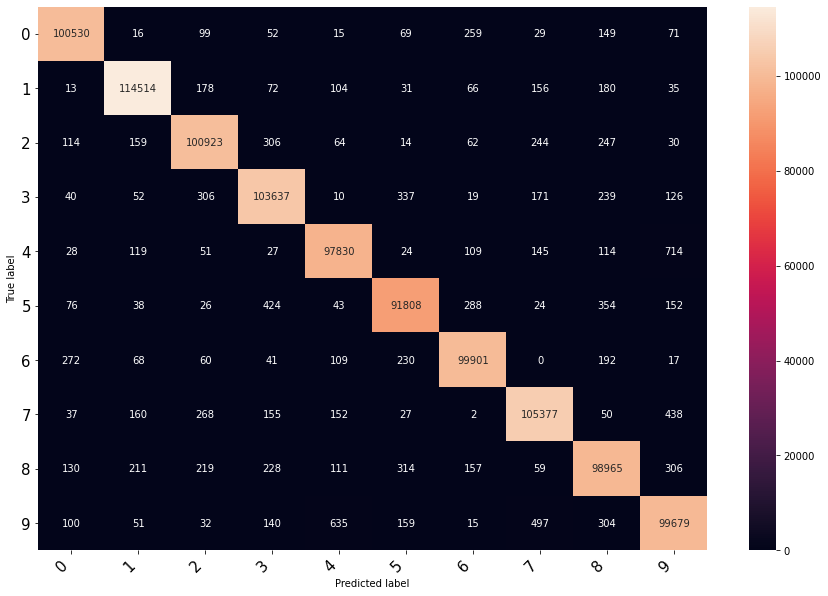

Epoch=  20 , batch =  0 , cost =  0.0003406110918149352 , accuracy =  1.0
Epoch=  20 , batch =  625 , cost =  2.2046519006835297e-05 , accuracy =  1.0
Epoch=  20 , batch =  1250 , cost =  0.0011431868188083172 , accuracy =  1.0
Validate Epoch=  20 , batch =  0 , cost =  1.8775181160890497e-06 , accuracy =  1.0
Epoch:  20  averaged cost =  0.001316741807386279  train accuracy =  0.9880979709715639


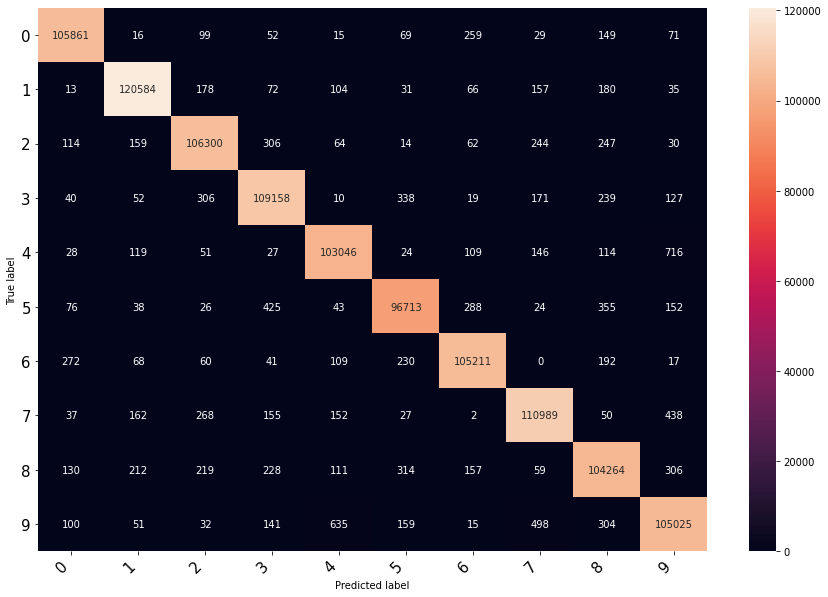

Epoch=  21 , batch =  0 , cost =  4.868087125942111e-05 , accuracy =  1.0
Epoch=  21 , batch =  625 , cost =  0.00012998237798456103 , accuracy =  1.0
Epoch=  21 , batch =  1250 , cost =  2.2351736461700966e-08 , accuracy =  1.0
Validate Epoch=  21 , batch =  0 , cost =  9.571899863658473e-05 , accuracy =  1.0
Epoch:  21  averaged cost =  0.001140545355156064  train accuracy =  0.9886568001015572


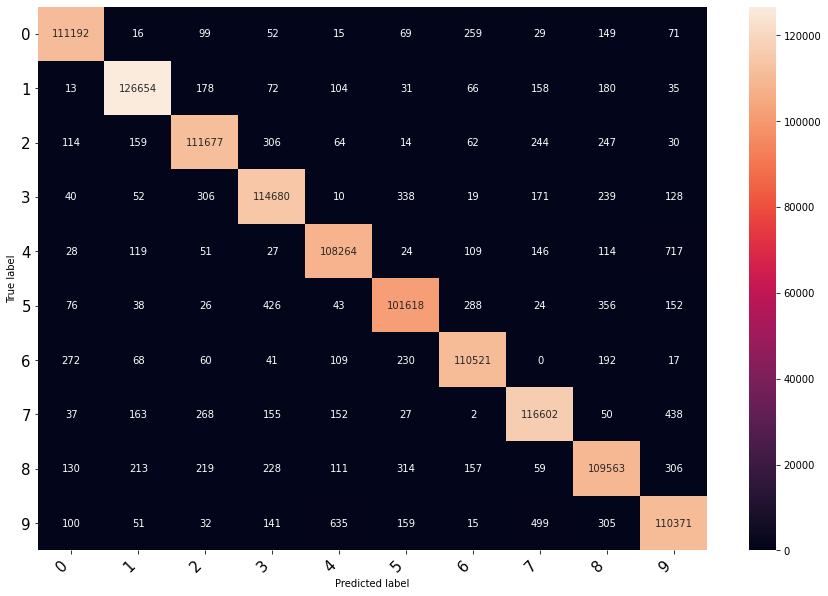

Epoch=  22 , batch =  0 , cost =  4.097799433111504e-07 , accuracy =  1.0
Epoch=  22 , batch =  625 , cost =  0.006661680527031422 , accuracy =  1.0
Epoch=  22 , batch =  1250 , cost =  0.0008888928568921983 , accuracy =  1.0
Validate Epoch=  22 , batch =  0 , cost =  8.531794446753338e-05 , accuracy =  1.0
Epoch:  22  averaged cost =  0.0011200133012607694  train accuracy =  0.9891648265833692


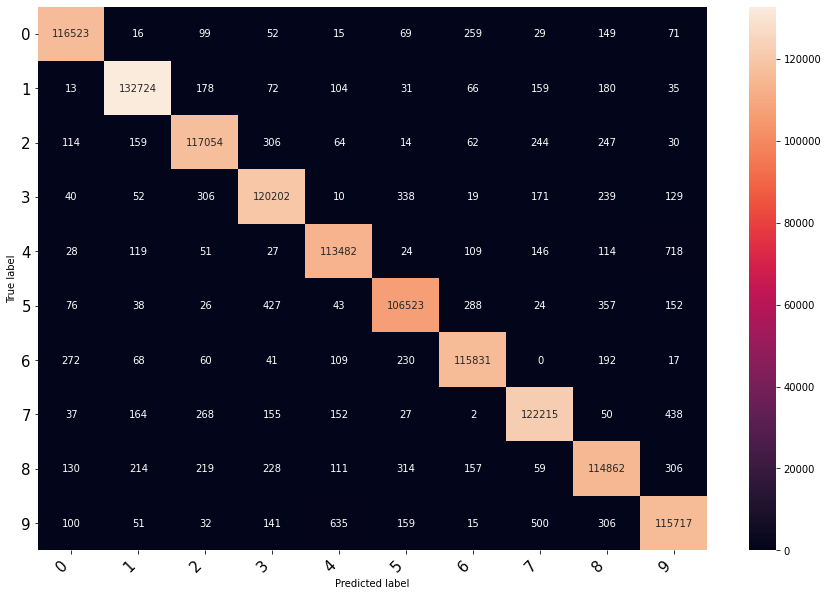

Epoch=  23 , batch =  0 , cost =  5.1425766287138686e-05 , accuracy =  1.0
Epoch=  23 , batch =  625 , cost =  1.5273670328497246e-07 , accuracy =  1.0
Epoch=  23 , batch =  1250 , cost =  9.499345878793974e-07 , accuracy =  1.0
Validate Epoch=  23 , batch =  0 , cost =  5.438911330202245e-07 , accuracy =  1.0
Epoch:  23  averaged cost =  0.001104146707803011  train accuracy =  0.9896286768493715


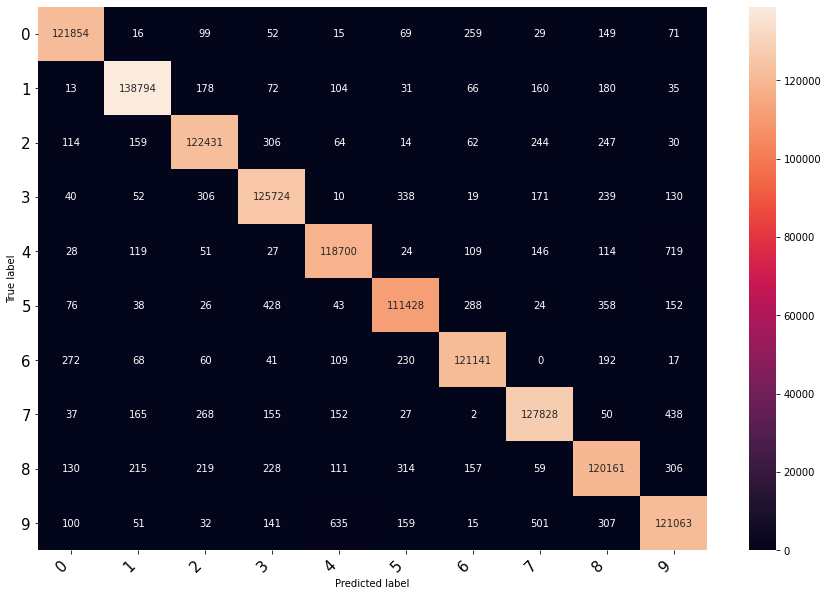

Epoch=  24 , batch =  0 , cost =  6.03495436735102e-07 , accuracy =  1.0
Epoch=  24 , batch =  625 , cost =  3.2409860750703956e-07 , accuracy =  1.0
Epoch=  24 , batch =  1250 , cost =  2.607702853651972e-08 , accuracy =  1.0
Validate Epoch=  24 , batch =  0 , cost =  0.03331570327281952 , accuracy =  1.0
Epoch:  24  averaged cost =  0.0011007650755345821  train accuracy =  0.9900538729265402


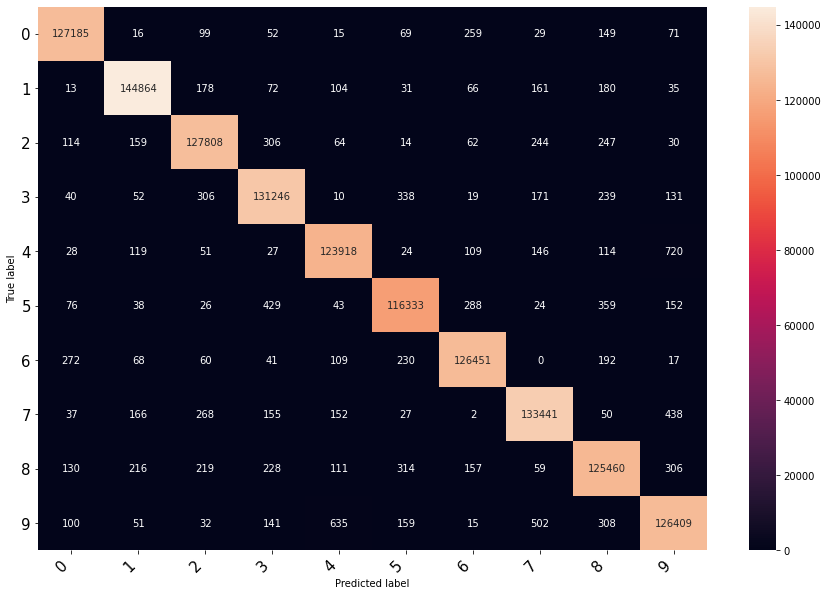

Epoch=  25 , batch =  0 , cost =  7.4571476034179796e-06 , accuracy =  1.0
Epoch=  25 , batch =  625 , cost =  0.0001206434826599434 , accuracy =  1.0
Epoch=  25 , batch =  1250 , cost =  0.001009449828416109 , accuracy =  1.0
Validate Epoch=  25 , batch =  0 , cost =  1.5646199358343438e-07 , accuracy =  1.0
Epoch:  25  averaged cost =  0.001079494715668261  train accuracy =  0.9904450533175355


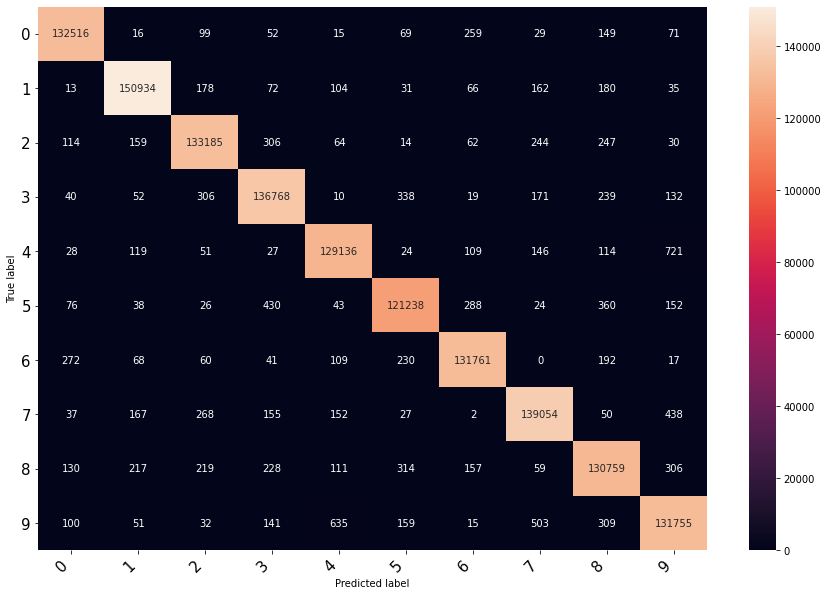

Learning Finished!
 averaged cost =  0.033024156489409505  train accuracy =  97.50286584693963


In [191]:
#Training Model1
print('Training Model1 the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 25
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer.zero_grad() 
        
        hypothesis = model1(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model1.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model1(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


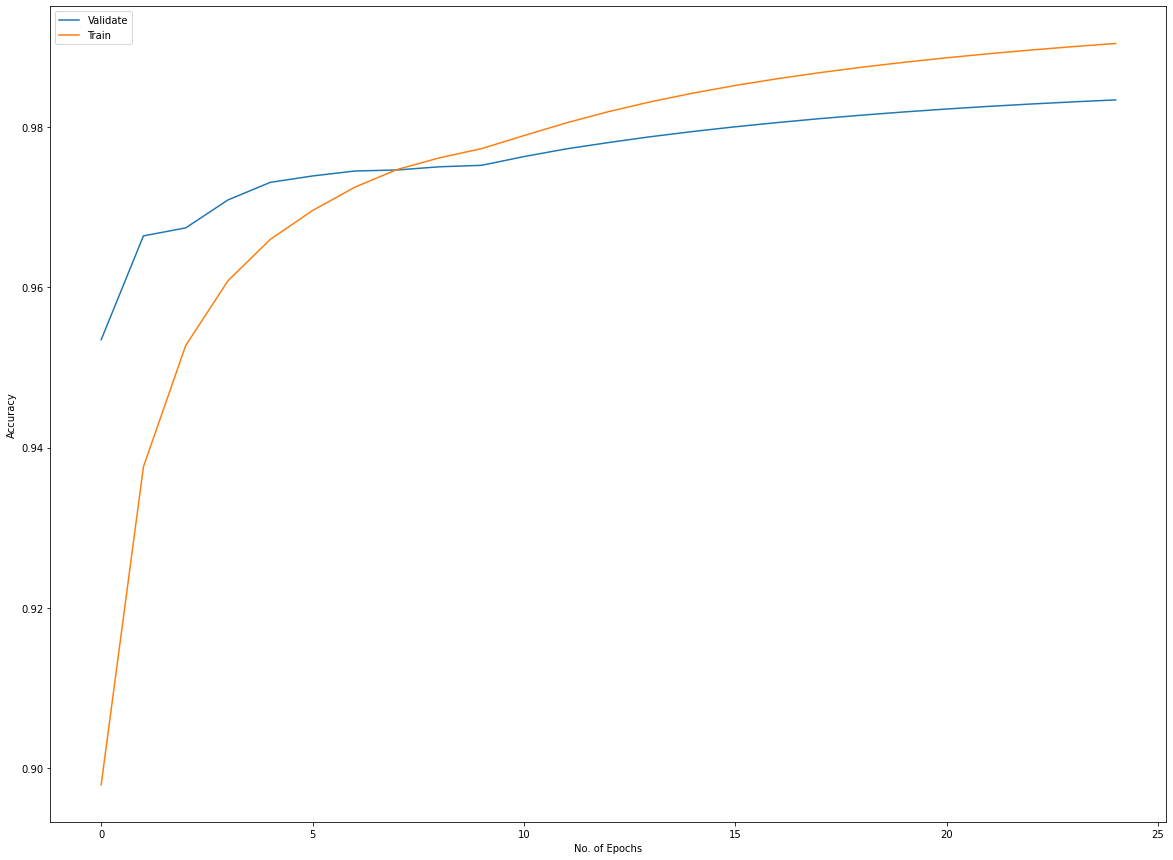

In [192]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


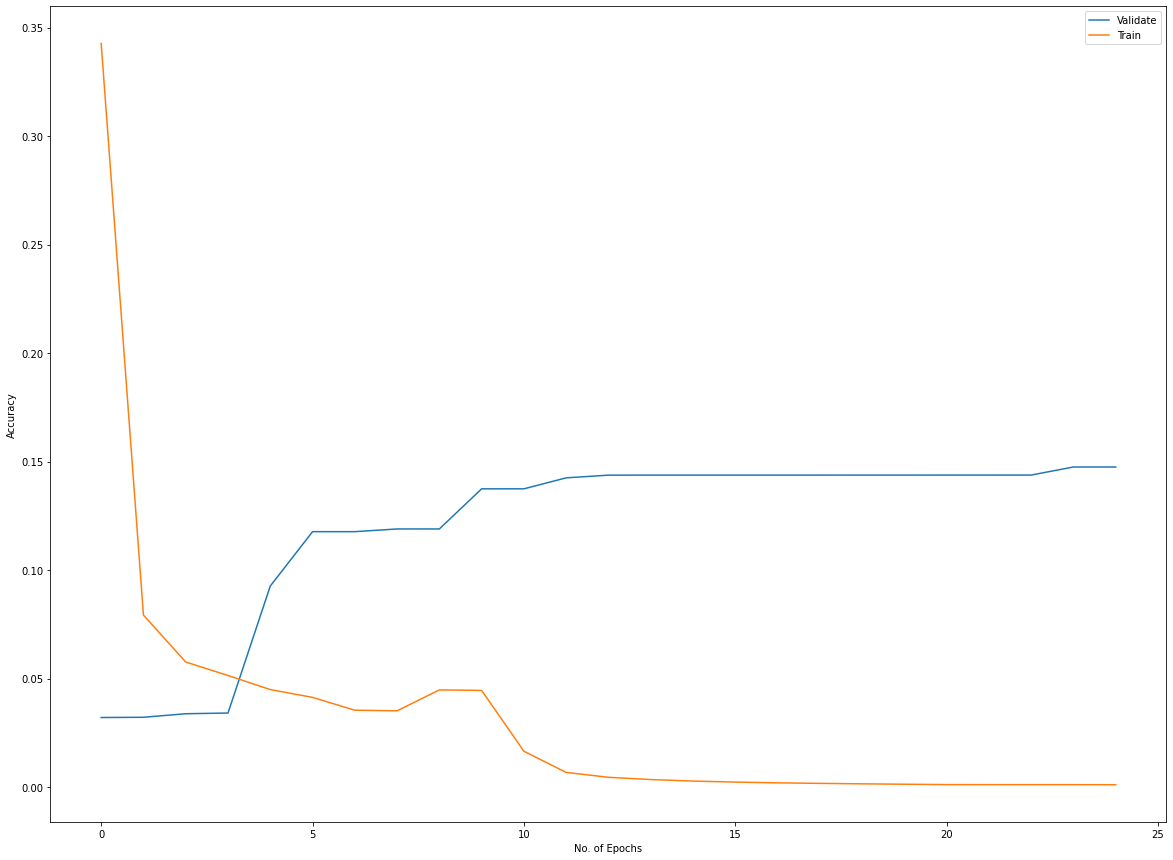

In [193]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [196]:
learning_rate = 0.05
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer2 = torch.optim.SGD(params=model2.parameters(), lr=learning_rate,momentum=0.9)
scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer2, step_size=10, gamma=0.1)

Training Model2 the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 15
Epoch=  1 , batch =  0 , cost =  0.0002697749878279865 , accuracy =  1.0
Epoch=  1 , batch =  625 , cost =  9.827123722061515e-05 , accuracy =  1.0
Epoch=  1 , batch =  1250 , cost =  1.031896090353257e-06 , accuracy =  1.0
Validate Epoch=  1 , batch =  0 , cost =  7.88221677794354e-06 , accuracy =  1.0
Epoch:  1  averaged cost =  0.0010607875883579254  train accuracy =  0.9998333827014217


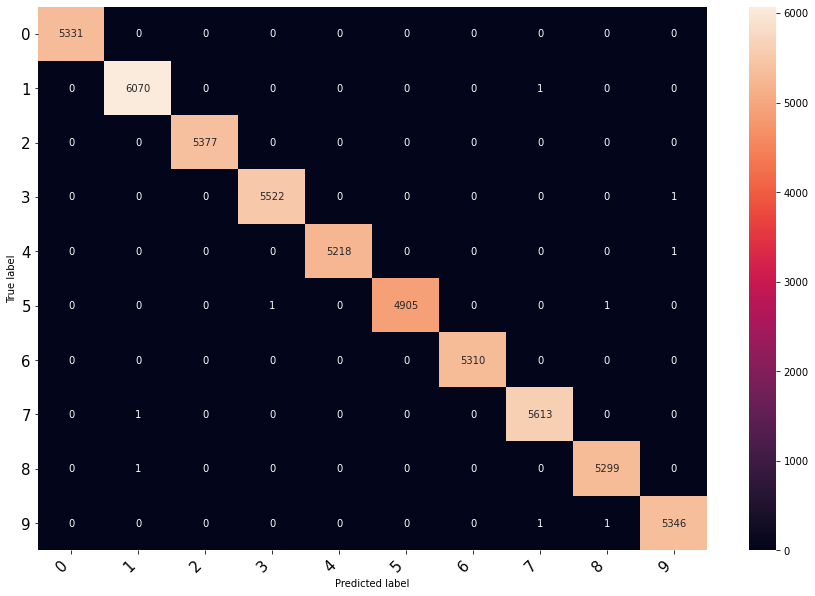

Epoch=  2 , batch =  0 , cost =  3.3191283819178352e-06 , accuracy =  1.0
Epoch=  2 , batch =  625 , cost =  1.4528606584462977e-07 , accuracy =  1.0
Epoch=  2 , batch =  1250 , cost =  1.1175860947787442e-07 , accuracy =  1.0
Validate Epoch=  2 , batch =  0 , cost =  0.0 , accuracy =  1.0
Epoch:  2  averaged cost =  0.0010607867734506726  train accuracy =  0.9998333827014217


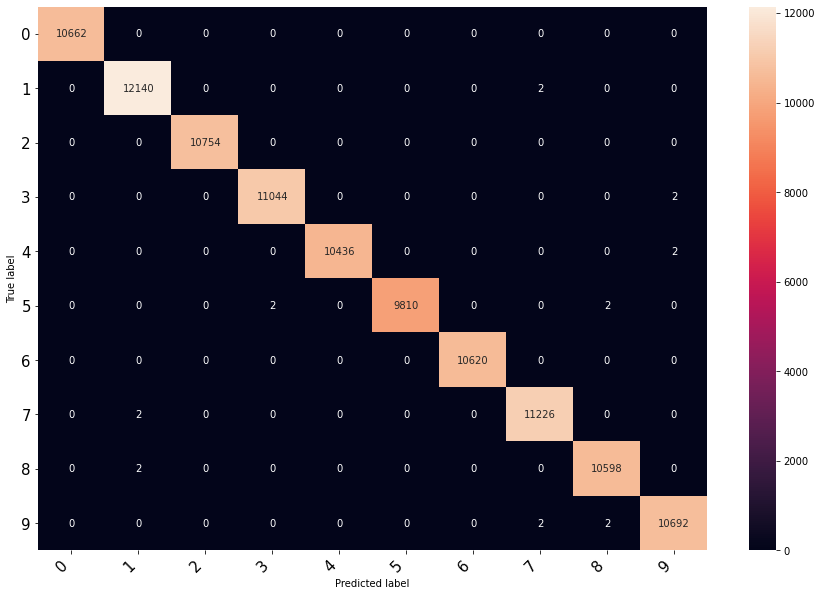

Epoch=  3 , batch =  0 , cost =  4.818692468688823e-05 , accuracy =  1.0
Epoch=  3 , batch =  625 , cost =  0.02835094928741455 , accuracy =  0.96875
Epoch=  3 , batch =  1250 , cost =  0.016969935968518257 , accuracy =  1.0
Validate Epoch=  3 , batch =  0 , cost =  0.0 , accuracy =  1.0
Epoch:  3  averaged cost =  0.0010607861913740635  train accuracy =  0.9998333827014217


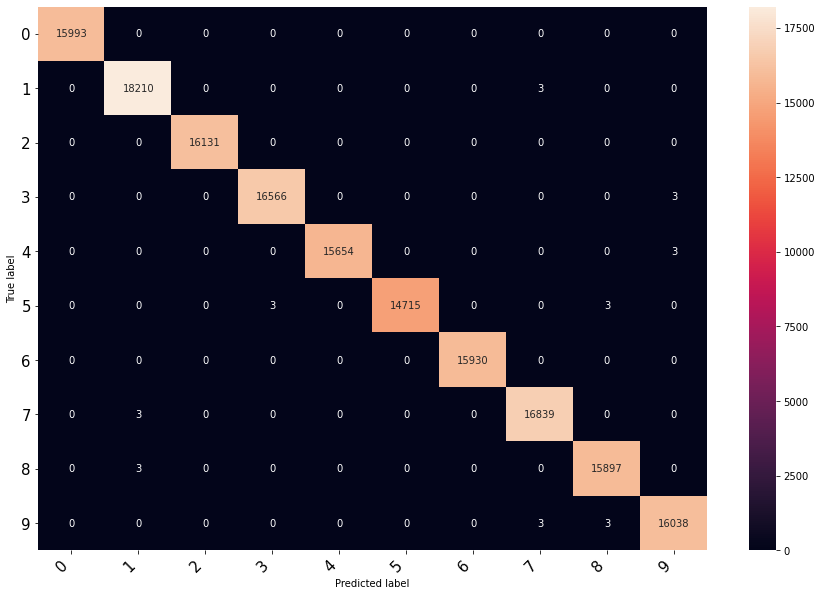

Epoch=  4 , batch =  0 , cost =  7.95993946667295e-06 , accuracy =  1.0
Epoch=  4 , batch =  625 , cost =  0.0016570707084611058 , accuracy =  1.0
Epoch=  4 , batch =  1250 , cost =  3.181018109899014e-05 , accuracy =  1.0
Validate Epoch=  4 , batch =  0 , cost =  1.639125599695035e-07 , accuracy =  1.0
Epoch:  4  averaged cost =  0.0010607868898659945  train accuracy =  0.9998333827014217


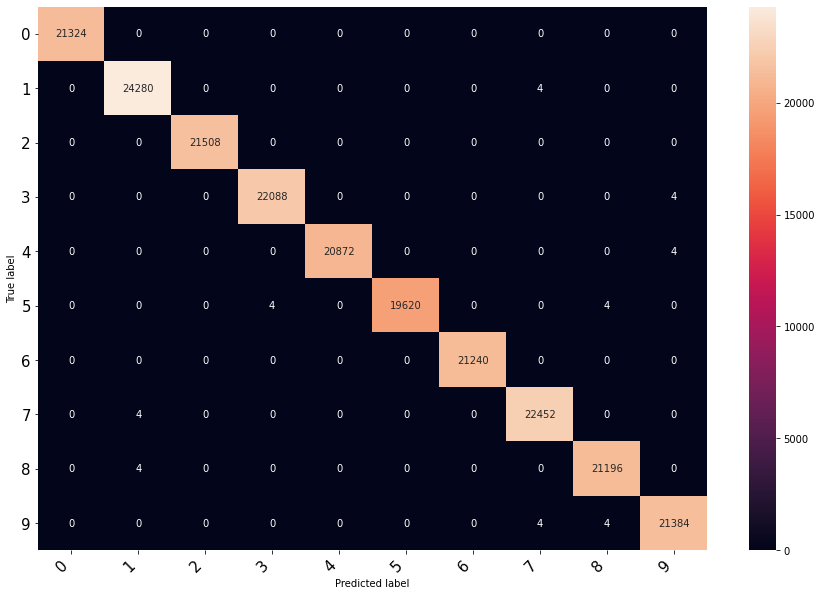

Epoch=  5 , batch =  0 , cost =  0.00014115648809820414 , accuracy =  1.0
Epoch=  5 , batch =  625 , cost =  0.0012694764882326126 , accuracy =  1.0
Epoch=  5 , batch =  1250 , cost =  3.599654519348405e-05 , accuracy =  1.0
Validate Epoch=  5 , batch =  0 , cost =  0.0004797820292878896 , accuracy =  1.0
Epoch:  5  averaged cost =  0.0010609296150505543  train accuracy =  0.9998333827014217


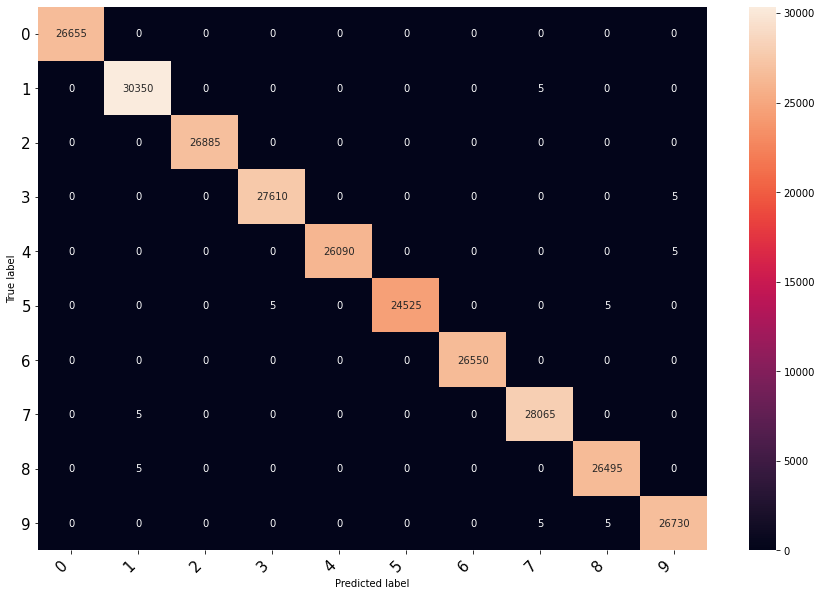

Epoch=  6 , batch =  0 , cost =  1.2813095963792875e-05 , accuracy =  1.0
Epoch=  6 , batch =  625 , cost =  3.5688059142557904e-05 , accuracy =  1.0
Epoch=  6 , batch =  1250 , cost =  3.7475706449185964e-06 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  5.5511372920591384e-05 , accuracy =  0.96875
Epoch:  6  averaged cost =  0.0010608036536723375  train accuracy =  0.9998333827014217


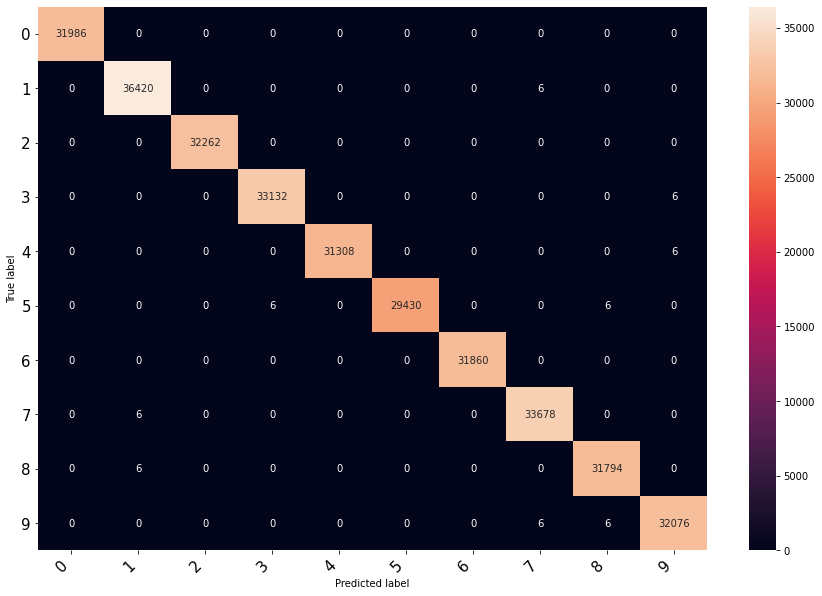

Epoch=  7 , batch =  0 , cost =  0.0007796239806339145 , accuracy =  1.0
Epoch=  7 , batch =  625 , cost =  0.00029037107015028596 , accuracy =  1.0
Epoch=  7 , batch =  1250 , cost =  0.001869651721790433 , accuracy =  1.0
Validate Epoch=  7 , batch =  0 , cost =  3.859281605400611e-06 , accuracy =  1.0
Epoch:  7  averaged cost =  0.0010607868898659945  train accuracy =  0.9998333827014217


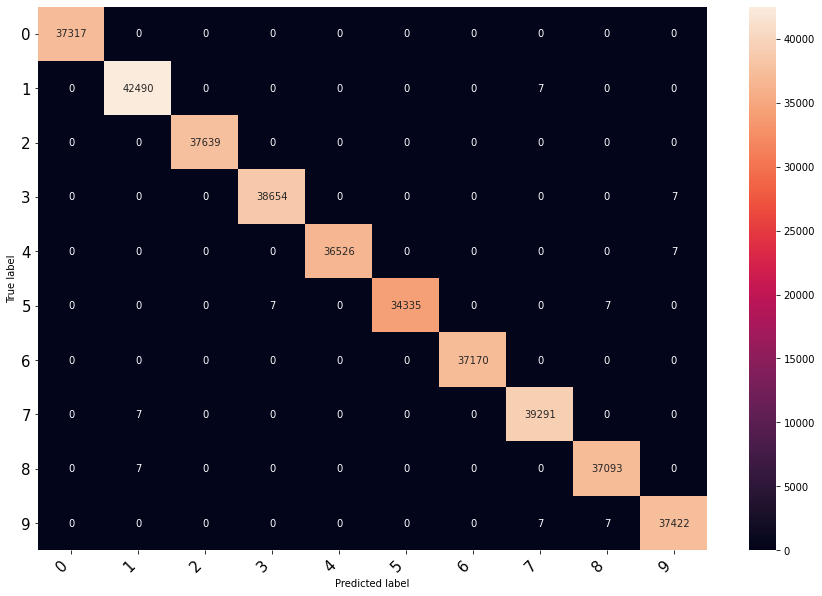

Epoch=  8 , batch =  0 , cost =  2.469649916747585e-05 , accuracy =  1.0
Epoch=  8 , batch =  625 , cost =  3.878599454765208e-05 , accuracy =  1.0
Epoch=  8 , batch =  1250 , cost =  0.002918947720900178 , accuracy =  1.0
Validate Epoch=  8 , batch =  0 , cost =  9.387664476889768e-07 , accuracy =  1.0
Epoch:  8  averaged cost =  0.0010607859585434198  train accuracy =  0.9998333827014217


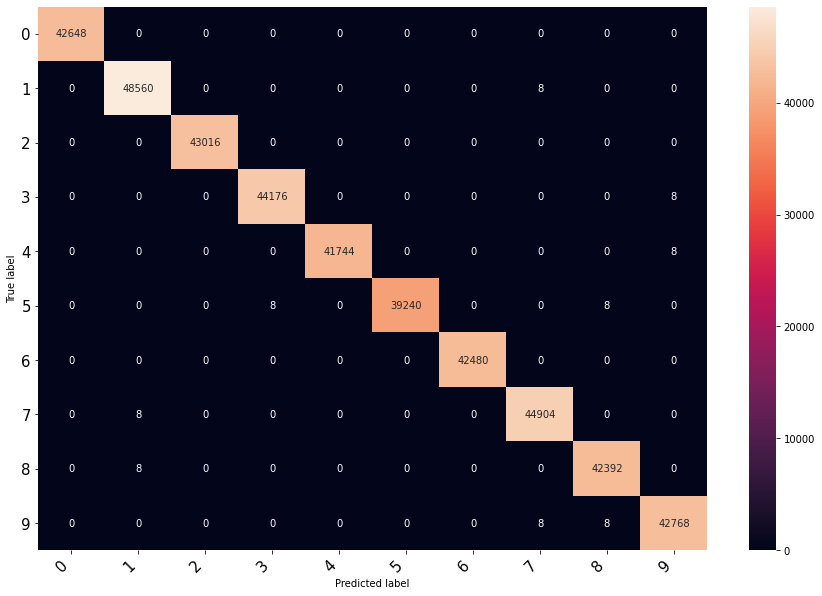

Epoch=  9 , batch =  0 , cost =  8.005146810319275e-06 , accuracy =  1.0
Epoch=  9 , batch =  625 , cost =  2.421429314836132e-07 , accuracy =  1.0
Epoch=  9 , batch =  1250 , cost =  4.751230517285876e-05 , accuracy =  1.0
Validate Epoch=  9 , batch =  0 , cost =  5.215404996761208e-08 , accuracy =  1.0
Epoch:  9  averaged cost =  0.00106078723911196  train accuracy =  0.9998333827014217


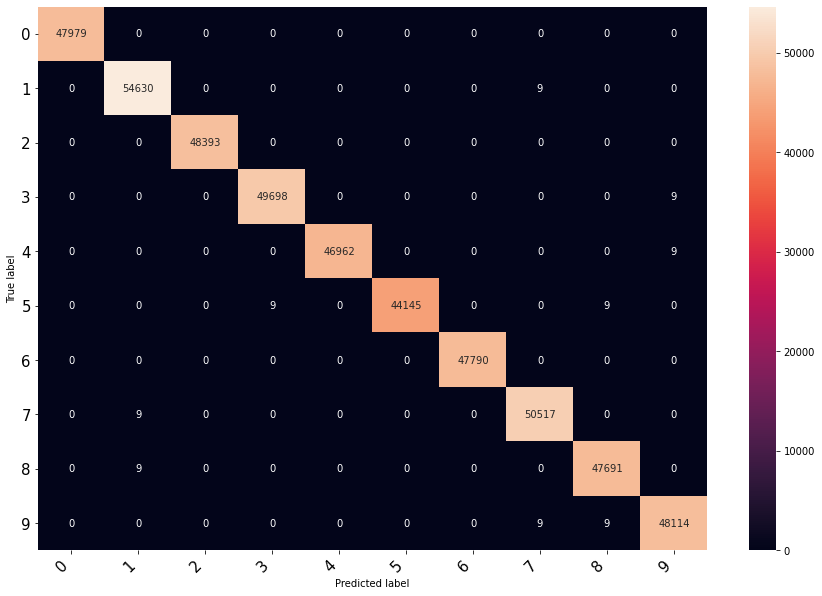

Epoch=  10 , batch =  0 , cost =  0.0015742003452032804 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.0007644850993528962 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  0.0017096144147217274 , accuracy =  1.0
Validate Epoch=  10 , batch =  0 , cost =  3.6580549931386486e-05 , accuracy =  0.9375
Epoch:  10  averaged cost =  0.0010607967851683497  train accuracy =  0.9998333827014217


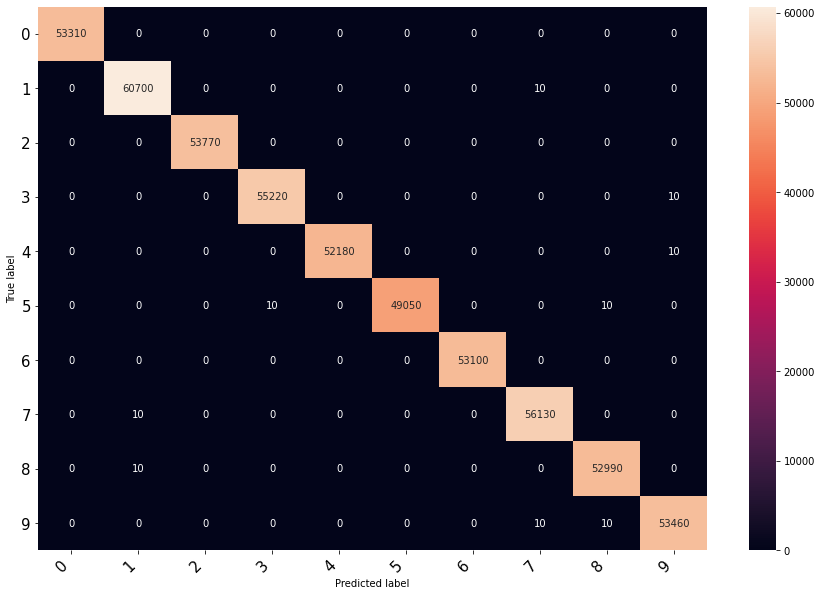

Epoch=  11 , batch =  0 , cost =  0.006766373757272959 , accuracy =  1.0
Epoch=  11 , batch =  625 , cost =  0.0008874997147358954 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  0.0003485924971755594 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  0.0007768204086460173 , accuracy =  1.0
Epoch:  11  averaged cost =  0.0010610175086185336  train accuracy =  0.9998333827014217


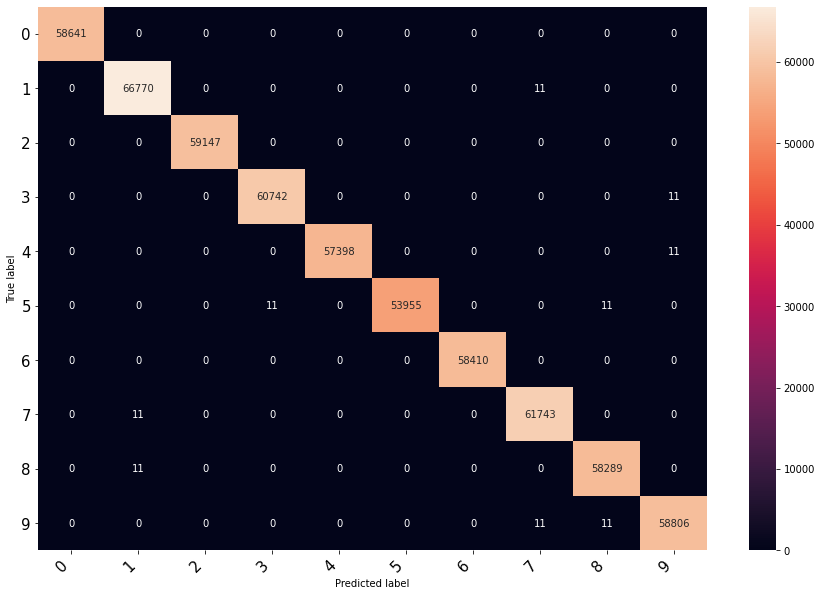

Epoch=  12 , batch =  0 , cost =  3.1552390282740816e-06 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  6.347254384309053e-06 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.00015982950571924448 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  6.705521116145974e-08 , accuracy =  1.0
Epoch:  12  averaged cost =  0.0010607859585434198  train accuracy =  0.9998333827014217


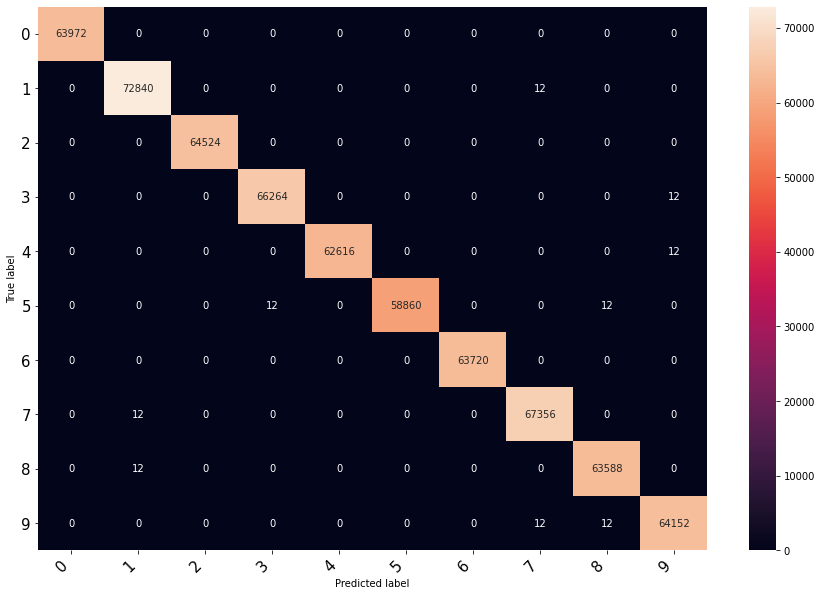

Epoch=  13 , batch =  0 , cost =  8.79161063949141e-07 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  0.0005791467847302556 , accuracy =  1.0
Epoch=  13 , batch =  1250 , cost =  1.1175870007207322e-08 , accuracy =  1.0
Validate Epoch=  13 , batch =  0 , cost =  1.0429943358758464e-05 , accuracy =  1.0
Epoch:  13  averaged cost =  0.001060789218172431  train accuracy =  0.9998333827014217


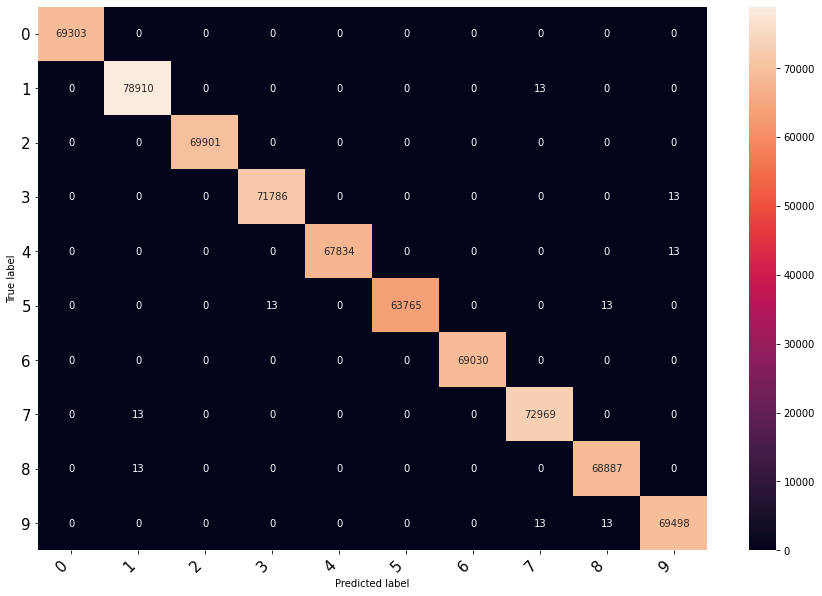

Epoch=  14 , batch =  0 , cost =  1.4901157641133977e-08 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  2.171769892811426e-06 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  4.1002775105880573e-05 , accuracy =  1.0
Validate Epoch=  14 , batch =  0 , cost =  1.2963895414941362e-06 , accuracy =  1.0
Epoch:  14  averaged cost =  0.001060786540620029  train accuracy =  0.9998333827014217


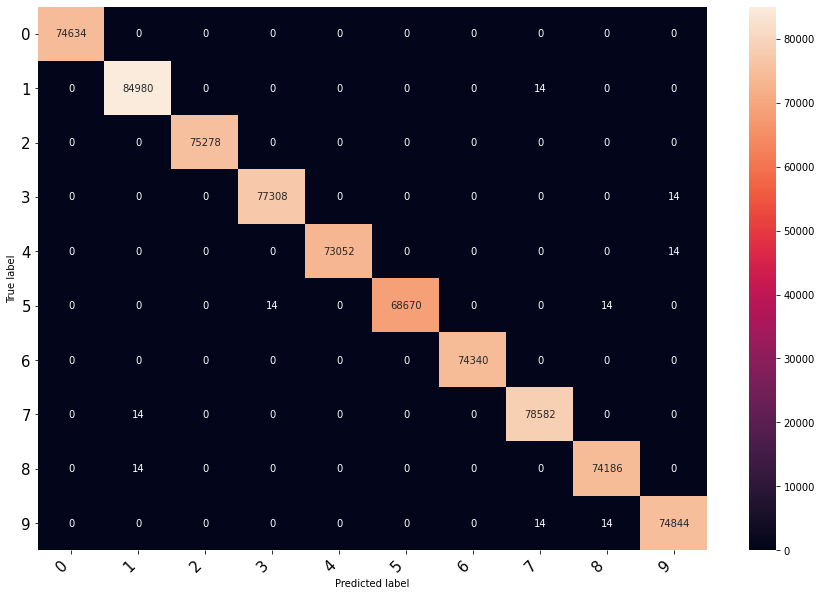

Epoch=  15 , batch =  0 , cost =  0.0005392227903939784 , accuracy =  1.0
Epoch=  15 , batch =  625 , cost =  5.014037014916539e-06 , accuracy =  1.0
Epoch=  15 , batch =  1250 , cost =  3.5649427445605397e-06 , accuracy =  1.0
Validate Epoch=  15 , batch =  0 , cost =  4.3213267986175197e-07 , accuracy =  0.90625
Epoch:  15  averaged cost =  0.0010607860749587417  train accuracy =  0.9998333827014217


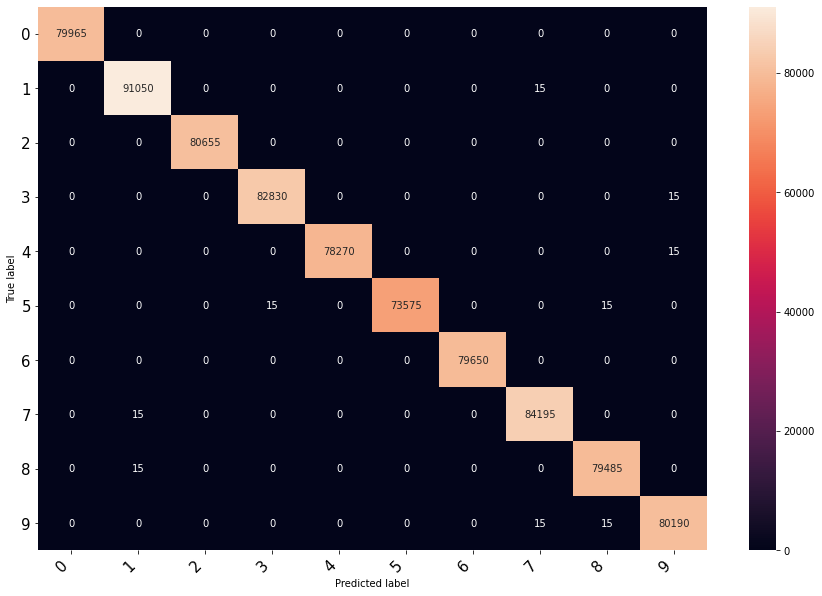

Learning Finished!
 averaged cost =  0.0010608135256916285  train accuracy =  99.98333827014216


In [200]:
#Training Model2
print('Training Model2 the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 15
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer2.zero_grad() 
        
        hypothesis = model2(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer2.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model2.eval()     
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model2(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler2.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


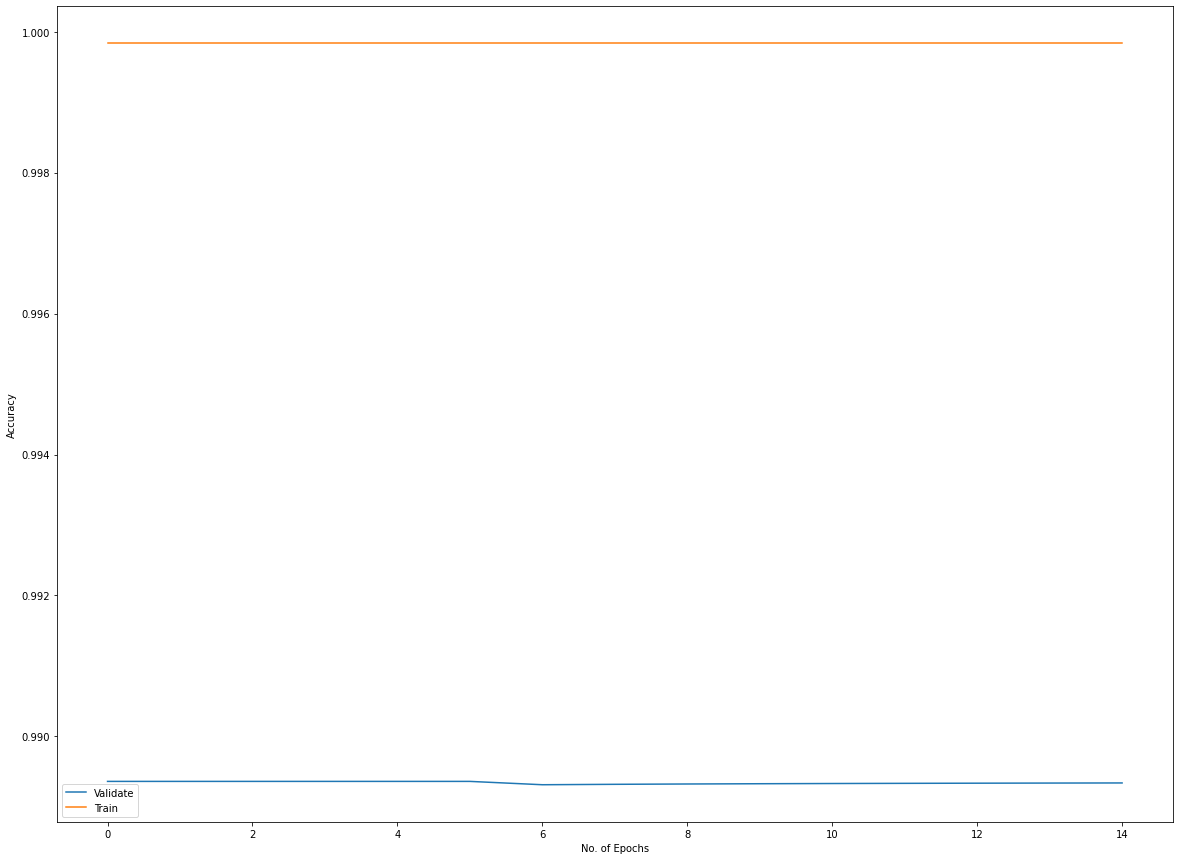

In [201]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


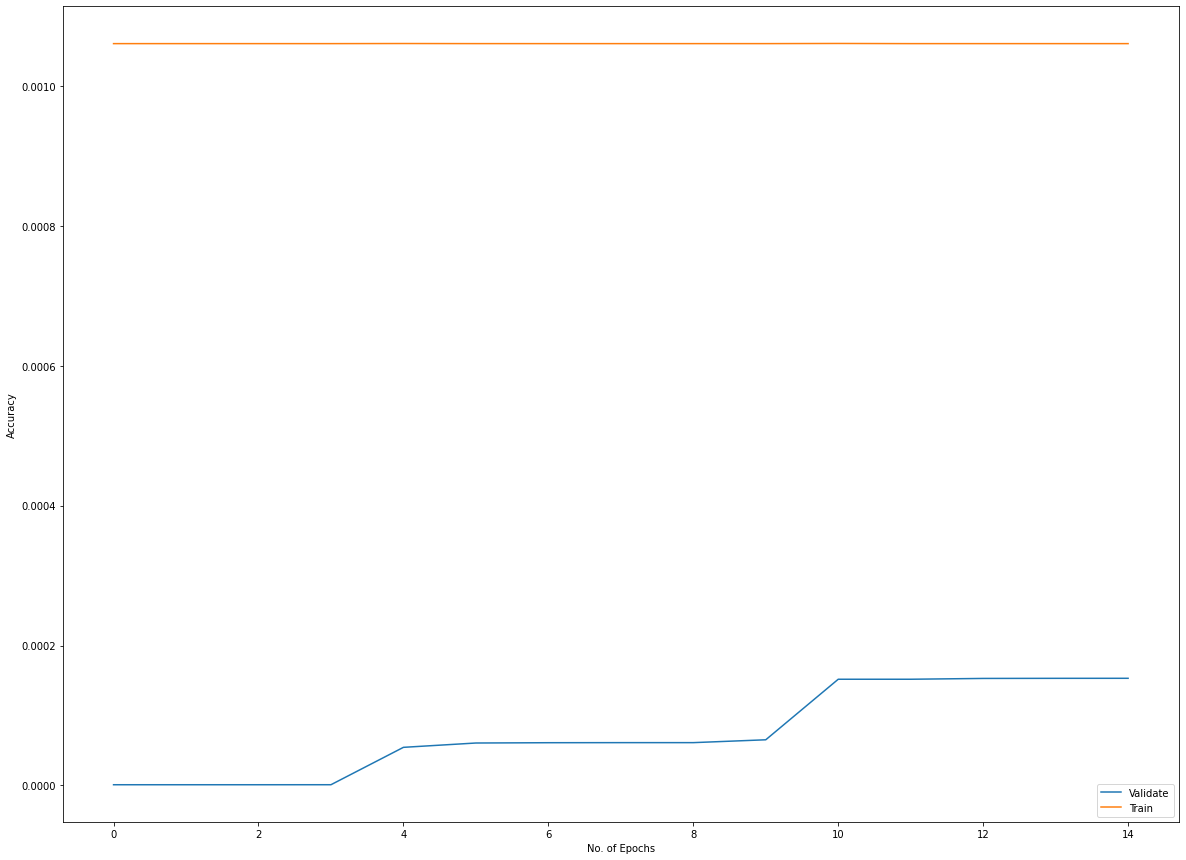

In [202]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [203]:
learning_rate = 0.05
criterion = torch.nn.CrossEntropyLoss()    # Softmax is internally computed.
optimizer3 = torch.optim.SGD(params=model3.parameters(), lr=0.001,momentum=0.9)
scheduler3 = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Training the Deep Learning network ...
total_batch  1687
Size of the testing dataset  torch.Size([10000, 28, 28])
Batch size is :  32
Total number of batches is :  1687
Total number of epochs is : 15
Epoch=  1 , batch =  0 , cost =  3.07816481590271 , accuracy =  0.09375
Epoch=  1 , batch =  625 , cost =  1.8671828508377075 , accuracy =  0.34375
Epoch=  1 , batch =  1250 , cost =  1.4285176992416382 , accuracy =  0.53125
Validate Epoch=  1 , batch =  0 , cost =  1.6054781675338745 , accuracy =  0.78125


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


Epoch:  1  averaged cost =  1.7058664560317993  train accuracy =  0.3909212085308057


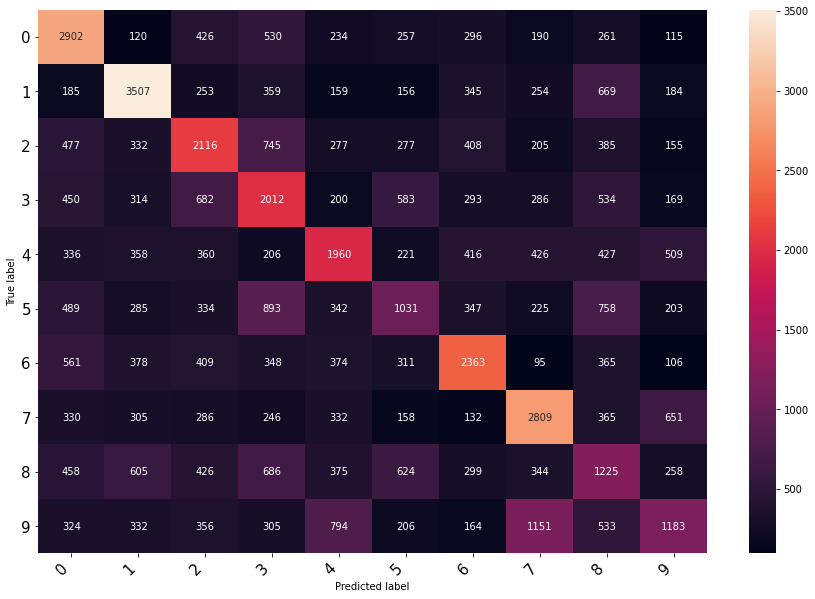

Epoch=  2 , batch =  0 , cost =  1.487223744392395 , accuracy =  0.90625
Epoch=  2 , batch =  625 , cost =  0.18671691417694092 , accuracy =  0.9375
Epoch=  2 , batch =  1250 , cost =  0.17469167709350586 , accuracy =  0.90625
Validate Epoch=  2 , batch =  0 , cost =  0.2511535584926605 , accuracy =  0.96875
Epoch:  2  averaged cost =  0.2882964611053467  train accuracy =  0.6570368039099526


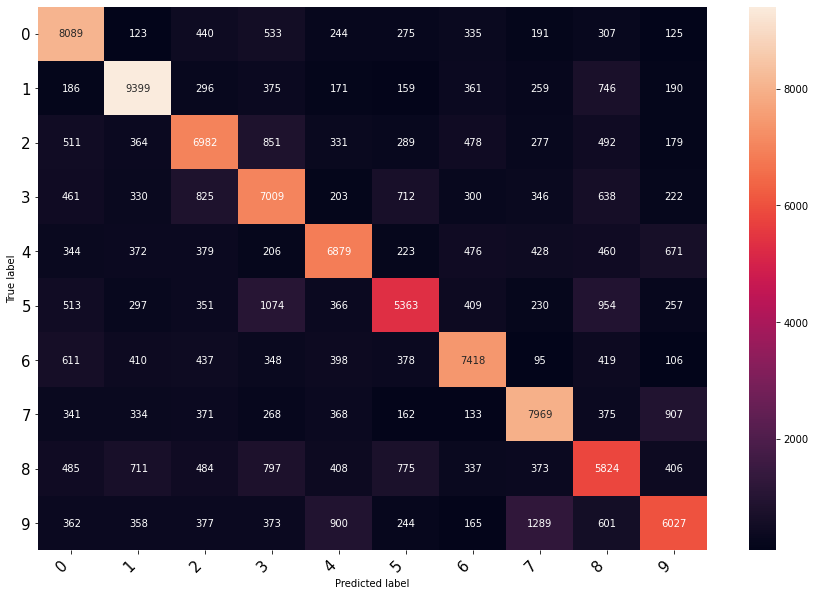

Epoch=  3 , batch =  0 , cost =  0.10125311464071274 , accuracy =  0.96875
Epoch=  3 , batch =  625 , cost =  0.07265803962945938 , accuracy =  0.96875
Epoch=  3 , batch =  1250 , cost =  0.017975322902202606 , accuracy =  1.0
Validate Epoch=  3 , batch =  0 , cost =  0.09640056639909744 , accuracy =  1.0
Epoch:  3  averaged cost =  0.14333182573318481  train accuracy =  0.7570287815955766


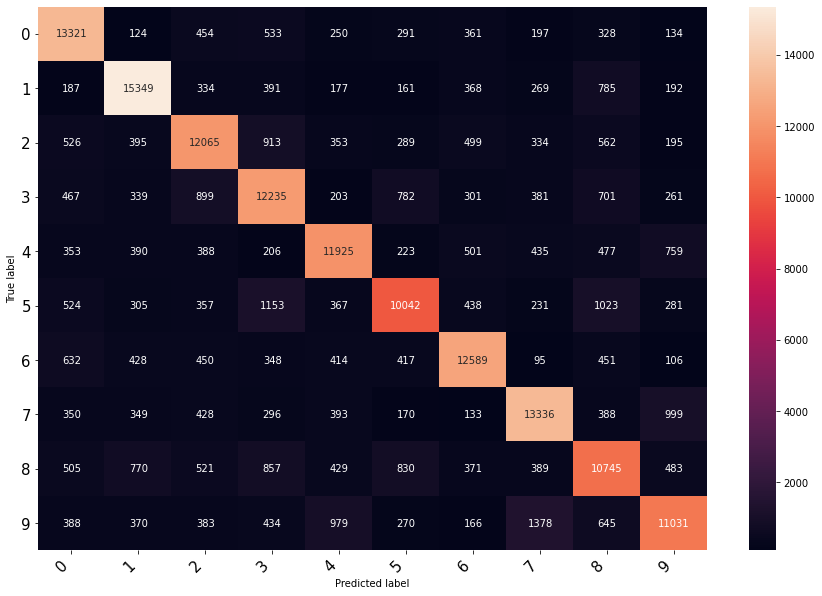

Epoch=  4 , batch =  0 , cost =  0.028440579771995544 , accuracy =  1.0
Epoch=  4 , batch =  625 , cost =  0.157892107963562 , accuracy =  0.90625
Epoch=  4 , batch =  1250 , cost =  0.18508775532245636 , accuracy =  0.96875
Validate Epoch=  4 , batch =  0 , cost =  0.17958934605121613 , accuracy =  1.0
Epoch:  4  averaged cost =  0.1107264831662178  train accuracy =  0.809311130035545


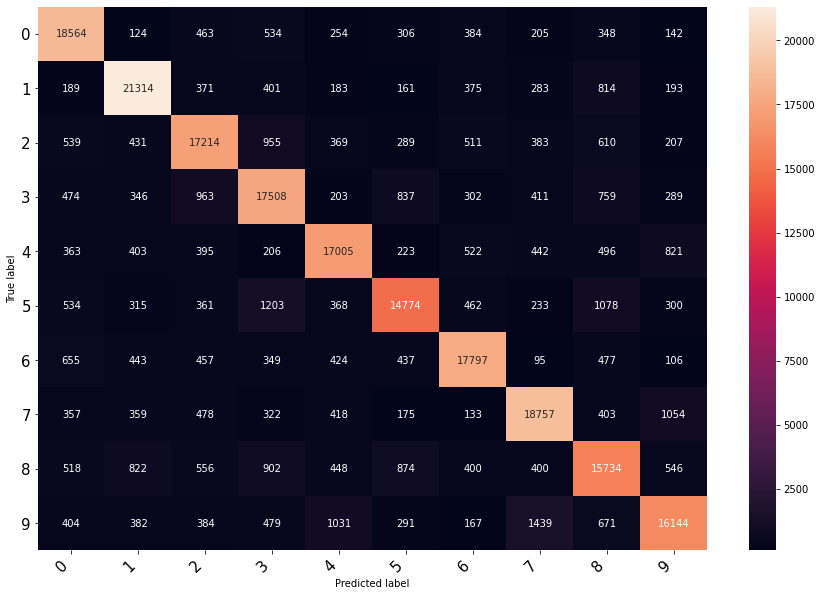

Epoch=  5 , batch =  0 , cost =  0.026525933295488358 , accuracy =  1.0
Epoch=  5 , batch =  625 , cost =  0.058501236140728 , accuracy =  0.96875
Epoch=  5 , batch =  1250 , cost =  0.0136745385825634 , accuracy =  1.0
Validate Epoch=  5 , batch =  0 , cost =  0.05786200240254402 , accuracy =  0.96875
Epoch:  5  averaged cost =  0.093076691031456  train accuracy =  0.8417357819905213


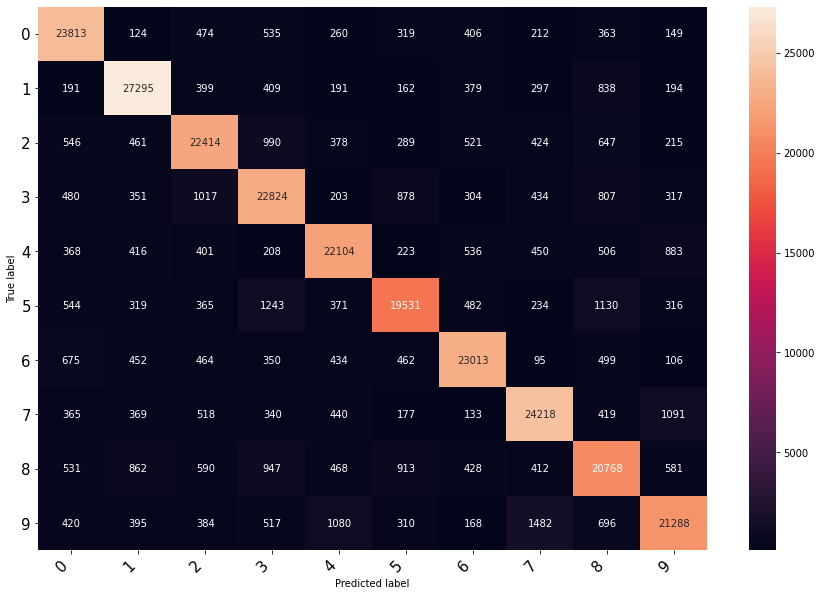

Epoch=  6 , batch =  0 , cost =  0.10773511976003647 , accuracy =  0.9375
Epoch=  6 , batch =  625 , cost =  0.09416835010051727 , accuracy =  1.0
Epoch=  6 , batch =  1250 , cost =  0.02547289803624153 , accuracy =  1.0
Validate Epoch=  6 , batch =  0 , cost =  0.02866322174668312 , accuracy =  0.96875
Epoch:  6  averaged cost =  0.08171174675226212  train accuracy =  0.8639106931279621


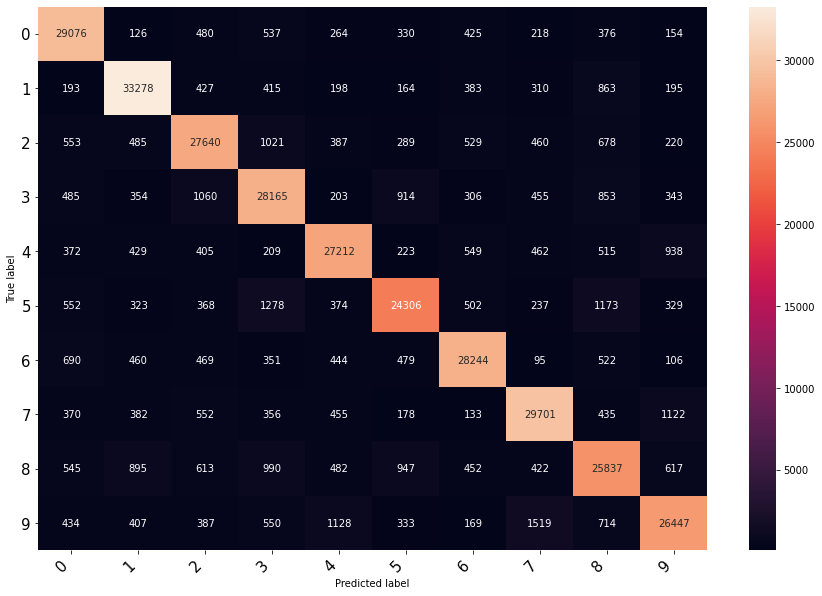

Epoch=  7 , batch =  0 , cost =  0.030191324651241302 , accuracy =  1.0
Epoch=  7 , batch =  625 , cost =  0.05305337905883789 , accuracy =  0.96875
Epoch=  7 , batch =  1250 , cost =  0.06198227405548096 , accuracy =  0.96875
Validate Epoch=  7 , batch =  0 , cost =  0.009942824020981789 , accuracy =  0.9375
Epoch:  7  averaged cost =  0.07310716807842255  train accuracy =  0.8801360443466486


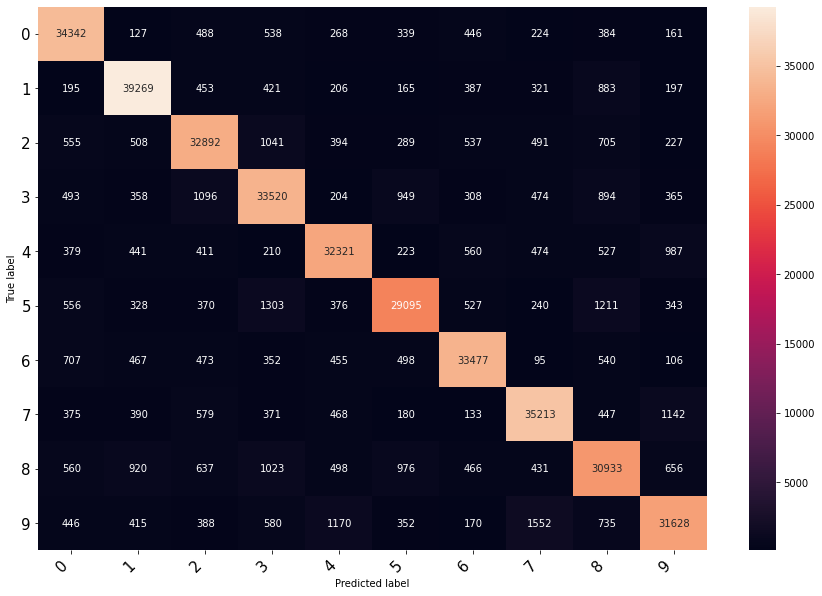

Epoch=  8 , batch =  0 , cost =  0.0970349833369255 , accuracy =  0.9375
Epoch=  8 , batch =  625 , cost =  0.10079816728830338 , accuracy =  0.96875
Epoch=  8 , batch =  1250 , cost =  0.049214042723178864 , accuracy =  0.96875
Validate Epoch=  8 , batch =  0 , cost =  0.1237659826874733 , accuracy =  1.0
Epoch:  8  averaged cost =  0.06673688441514969  train accuracy =  0.8925063869964455


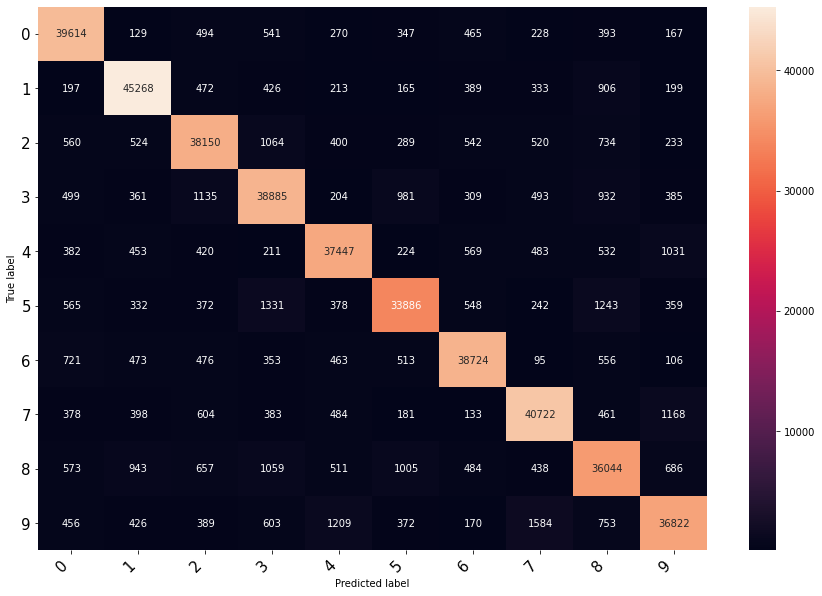

Epoch=  9 , batch =  0 , cost =  0.21573452651500702 , accuracy =  0.96875
Epoch=  9 , batch =  625 , cost =  0.10731393843889236 , accuracy =  0.90625
Epoch=  9 , batch =  1250 , cost =  0.06978720426559448 , accuracy =  0.96875
Validate Epoch=  9 , batch =  0 , cost =  0.016081349924206734 , accuracy =  1.0
Epoch:  9  averaged cost =  0.0613890215754509  train accuracy =  0.9023355219852554


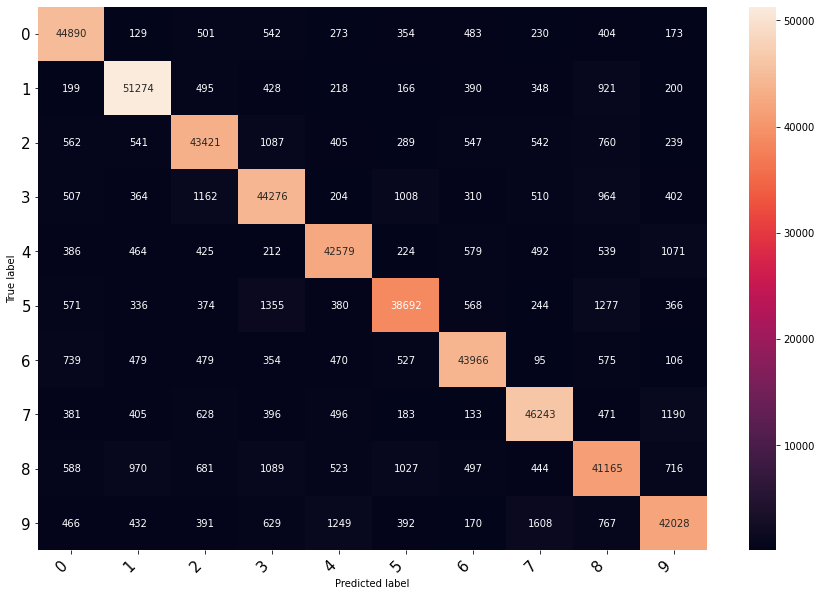

Epoch=  10 , batch =  0 , cost =  0.048369333148002625 , accuracy =  1.0
Epoch=  10 , batch =  625 , cost =  0.039765603840351105 , accuracy =  1.0
Epoch=  10 , batch =  1250 , cost =  0.04491003230214119 , accuracy =  0.96875
Validate Epoch=  10 , batch =  0 , cost =  0.09279315918684006 , accuracy =  0.96875
Epoch:  10  averaged cost =  0.05683230608701706  train accuracy =  0.9103376777251185


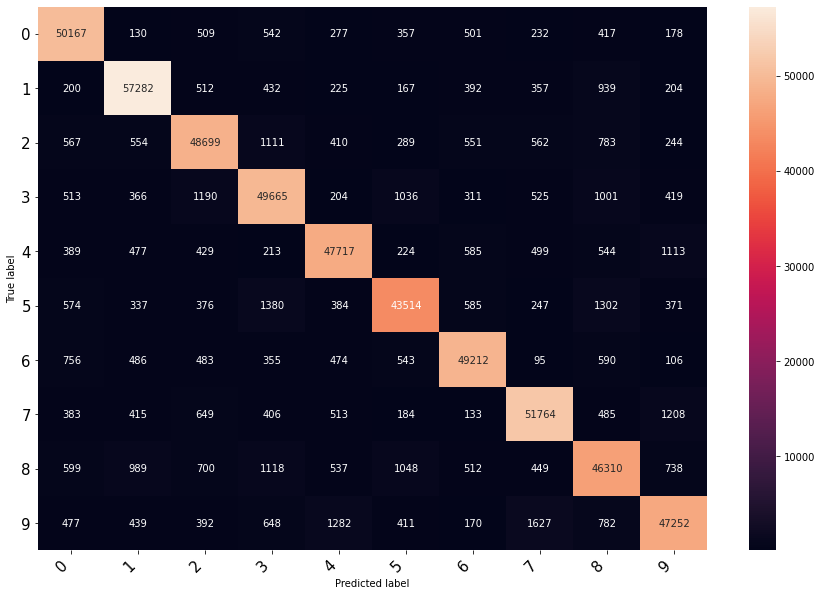

Epoch=  11 , batch =  0 , cost =  0.0051570371724665165 , accuracy =  1.0
Epoch=  11 , batch =  625 , cost =  0.01103278063237667 , accuracy =  1.0
Epoch=  11 , batch =  1250 , cost =  0.03291596099734306 , accuracy =  1.0
Validate Epoch=  11 , batch =  0 , cost =  0.03129047155380249 , accuracy =  0.9375
Epoch:  11  averaged cost =  0.053134579211473465  train accuracy =  0.9169825102326583


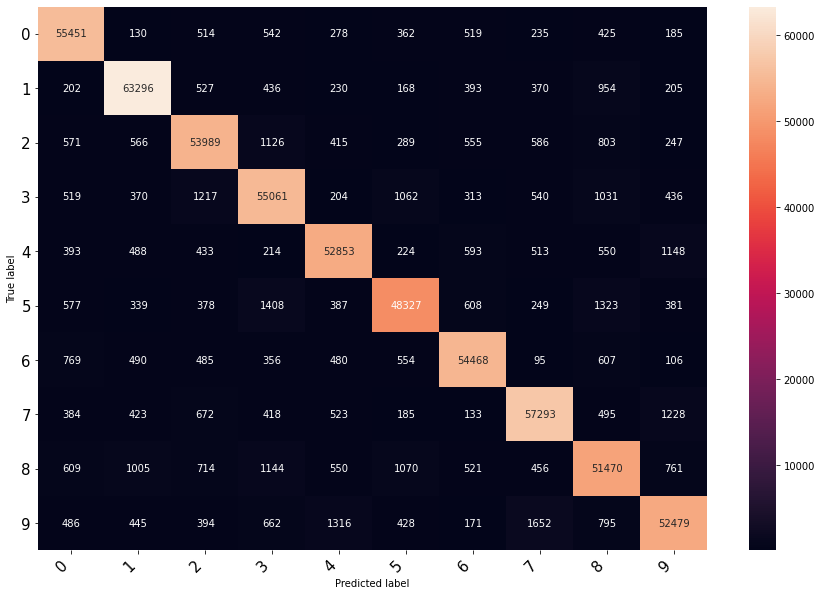

Epoch=  12 , batch =  0 , cost =  0.018659766763448715 , accuracy =  1.0
Epoch=  12 , batch =  625 , cost =  0.006308830343186855 , accuracy =  1.0
Epoch=  12 , batch =  1250 , cost =  0.04473055526614189 , accuracy =  1.0
Validate Epoch=  12 , batch =  0 , cost =  0.01580256037414074 , accuracy =  1.0
Epoch:  12  averaged cost =  0.04963408038020134  train accuracy =  0.922604722057662


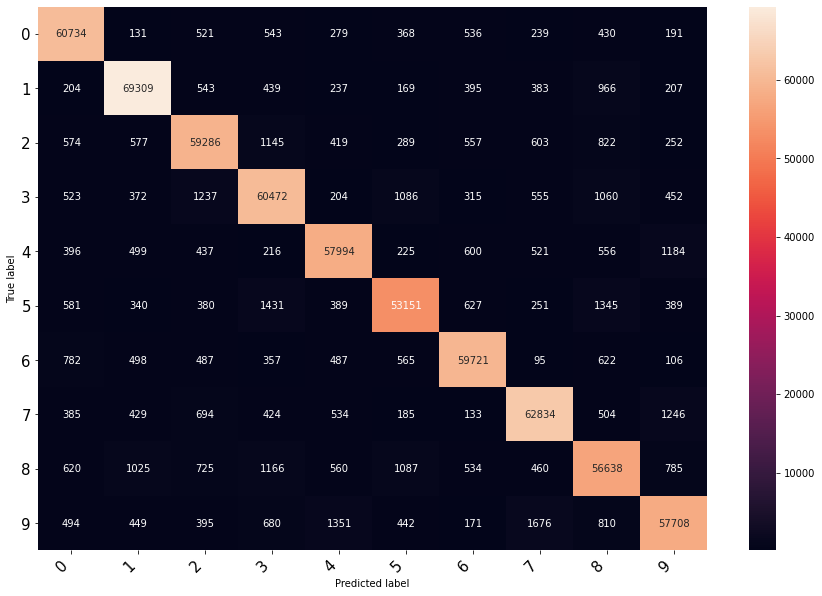

Epoch=  13 , batch =  0 , cost =  0.020990945398807526 , accuracy =  1.0
Epoch=  13 , batch =  625 , cost =  0.007219536695629358 , accuracy =  1.0
Epoch=  13 , batch =  1250 , cost =  0.07777831703424454 , accuracy =  0.96875
Validate Epoch=  13 , batch =  0 , cost =  0.005194426514208317 , accuracy =  1.0
Epoch:  13  averaged cost =  0.046458590775728226  train accuracy =  0.9274545433831571


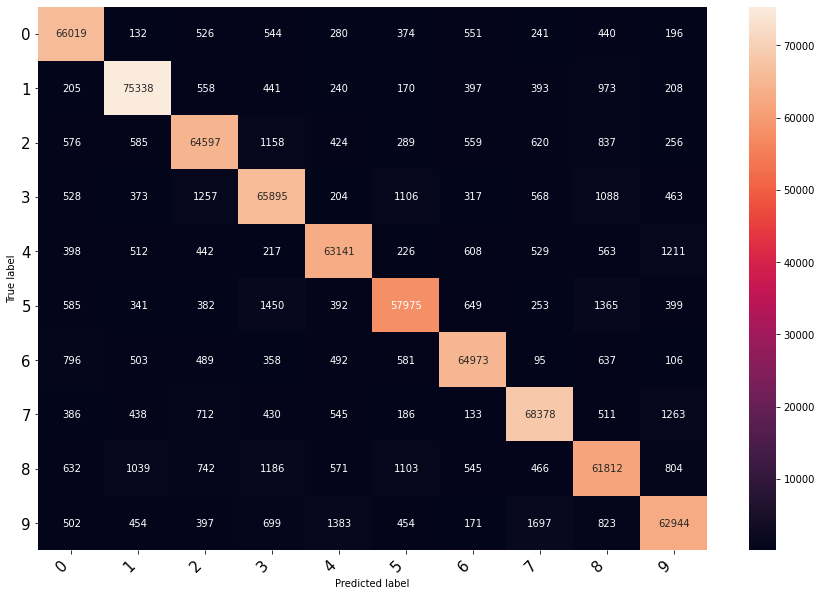

Epoch=  14 , batch =  0 , cost =  0.015341253019869328 , accuracy =  1.0
Epoch=  14 , batch =  625 , cost =  0.006053907331079245 , accuracy =  1.0
Epoch=  14 , batch =  1250 , cost =  0.01369523536413908 , accuracy =  1.0
Validate Epoch=  14 , batch =  0 , cost =  0.10580942779779434 , accuracy =  1.0
Epoch:  14  averaged cost =  0.043175406754016876  train accuracy =  0.9316855852234258


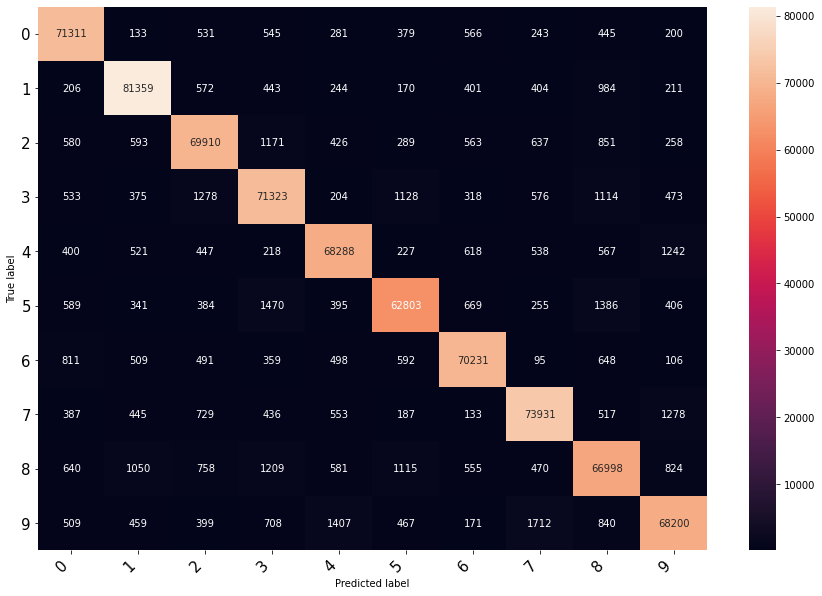

Epoch=  15 , batch =  0 , cost =  0.03839312121272087 , accuracy =  0.96875
Epoch=  15 , batch =  625 , cost =  0.0031074348371475935 , accuracy =  1.0
Epoch=  15 , batch =  1250 , cost =  0.03994238004088402 , accuracy =  1.0
Validate Epoch=  15 , batch =  0 , cost =  0.007349975407123566 , accuracy =  1.0
Epoch:  15  averaged cost =  0.041474927216768265  train accuracy =  0.9353882800157978


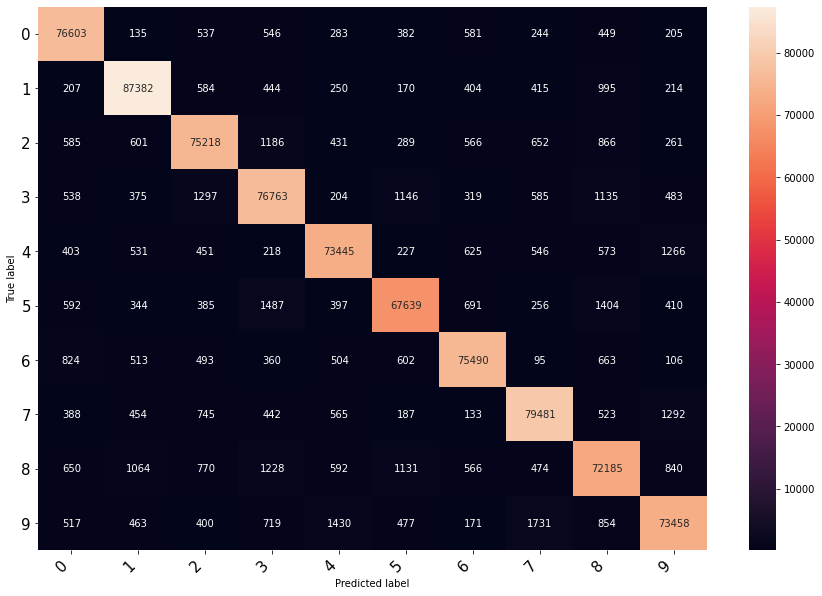

Learning Finished!
 averaged cost =  0.19433017522096635  train accuracy =  83.59583780771021


In [204]:
#Training Model3
print('Training the Deep Learning network ...')
train_cost = []
train_accuracy = []
#accuracy_total_train= []
total_avg_cost=[]
total_avg_accuracy=[]
validate_cost=[]
validate_accuracy=[]
total_validate_cost=[]
total_validate_accuracy=[]
avgv=0
training_epochs = 15
total_batch = len(train) // batch_size
print("total_batch ", total_batch)

#print('Size of the training dataset is ',train.data.size())
print('Size of the testing dataset ',test.data.size())
print('Batch size is : ',batch_size)
print('Total number of batches is : ',total_batch)
print('Total number of epochs is :',training_epochs)
confusion_matrix = torch.zeros(10,10)
for epoch in range(training_epochs):
    avg = 0
    
    for i, (batch_X, batch_Y) in enumerate(train_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)    

        optimizer3.zero_grad() 
        
        hypothesis = model3(X)
        _, preds = torch.max(hypothesis, 1)
        for t, p in zip(Y.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
        #predlist=torch.cat([predlist,preds.view(-1).cpu()])
        #lbllist=torch.cat([lbllist,Y.view(-1).cpu()])
        cost = criterion(hypothesis, Y) 
        
        
        cost.backward()   
        optimizer3.step() 
             
        
        prediction = hypothesis.data.max(dim=1)[1]
        #print(prediction)
        train_accuracy.append(((prediction.data == Y.data).float().mean()).item())
        train_cost.append(cost.item())   
        if i % 625 == 0:
            #print(prediction)
            print("Epoch= ",epoch+1,", batch = ",i,", cost = ",train_cost[-1],", accuracy = ",train_accuracy[-1])
       
        avg += cost.data / total_batch
    model3.eval()    
    for i, (batch_X, batch_Y) in enumerate(validation_loader):
        X = Variable(batch_X)    
        Y = Variable(batch_Y)
        prediction=model3(X)
        #costv = criterion(hypothesis, Y)     
        #costv.backward()
        validate_cost.append(cost.item())
        validate_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
        validate_accuracy.append(validate_prediction.float().mean().item()) 
        if i % 625 == 0:
                #print(prediction)
                print("Validate Epoch= ",epoch+1,", batch = ",i,", cost = ",validate_cost[-1],", accuracy = ",validate_accuracy[-1])
        #acc.append(accuracy)
        avgv+=cost.data/total_batch
    
    scheduler3.step()
    print("Epoch: ",epoch+1," averaged cost = ",avg.tolist()," train accuracy = ",sum(train_accuracy)/len(train_accuracy))
    total_avg_cost.append(avg.tolist())
    total_avg_accuracy.append(sum(train_accuracy)/len(train_accuracy))
    total_validate_cost.append(avgv.tolist())
    total_validate_accuracy.append(sum(validate_accuracy)/len(validate_accuracy))
    #Displaying Confusing Matrix in form of Heatmap.
    plt.figure(figsize=(15,10))

    class_names = ["0","1","2","3","4","5","6","7","8","9"]
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(int)
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
        

print('Learning Finished!')
print(" averaged cost = ",sum(total_avg_cost)/len(total_avg_cost)," train accuracy = ",(sum(total_avg_accuracy)/len(total_avg_accuracy))*100)

Accuracy Curves


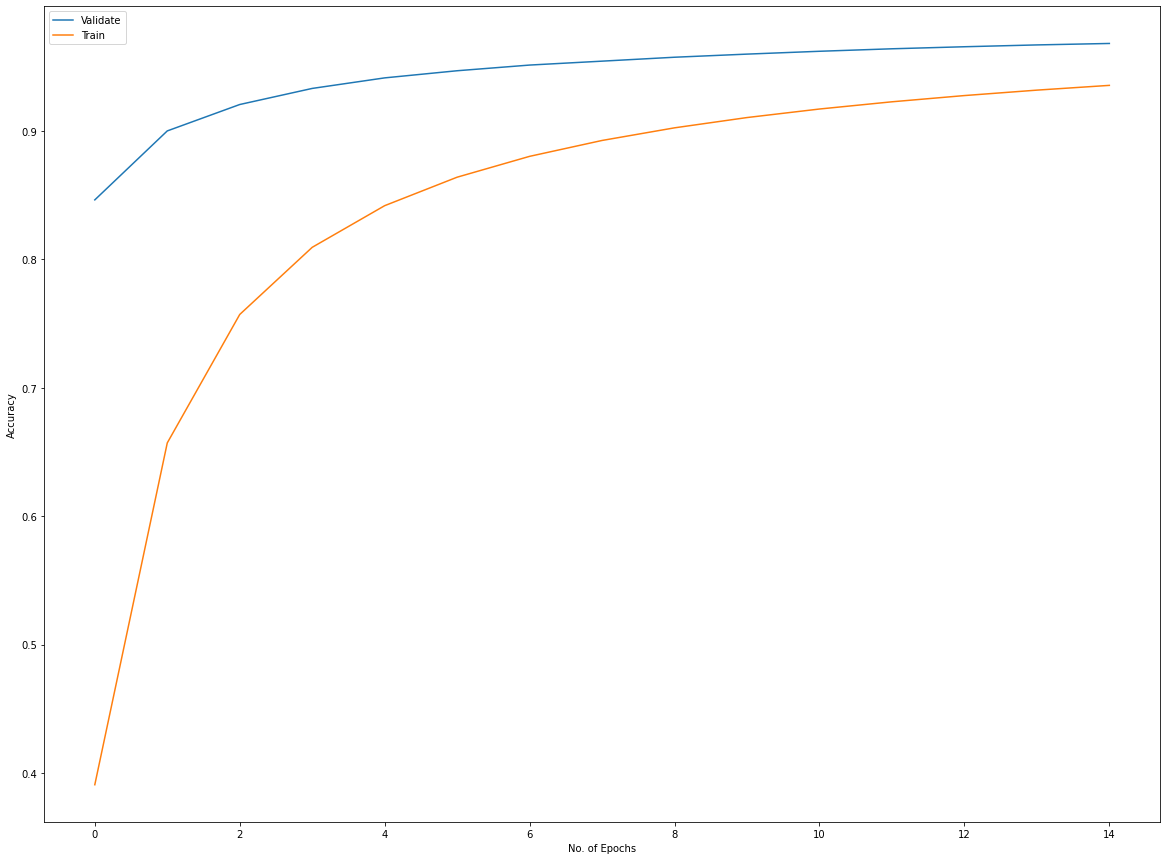

In [205]:
print("Accuracy Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_accuracy,label="Validate")
plt.plot(total_avg_accuracy,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss Curves


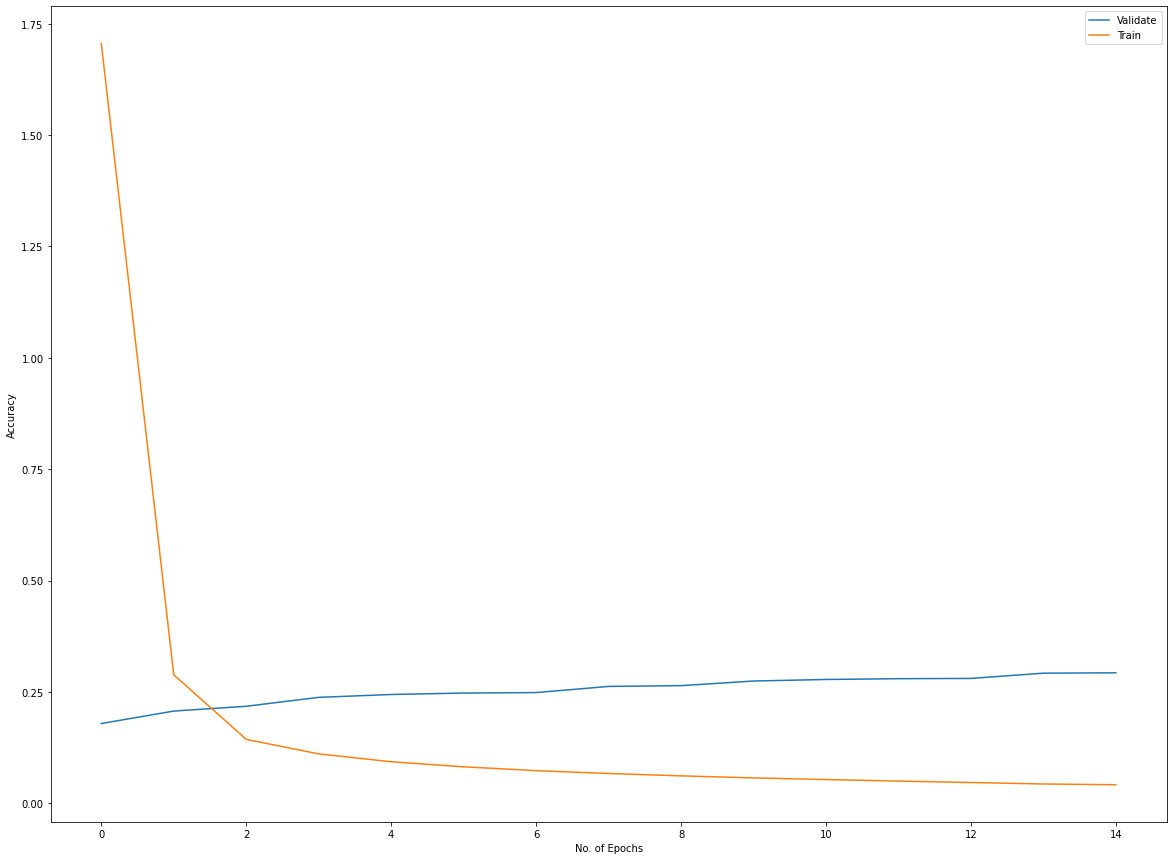

In [206]:
print("Loss Curves")
plt.figure(figsize=(20,15))
plt.plot(total_validate_cost,label="Validate")
plt.plot(total_avg_cost,label="Train")
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Testing Model1 the Deep Learning network ...


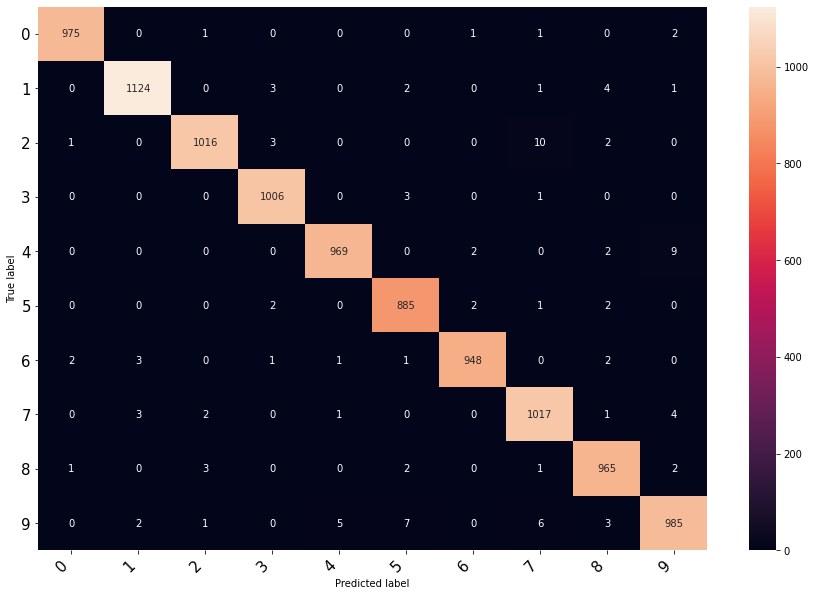

Accuracy is 98.8917731629393


In [207]:
print('Testing Model1 the Deep Learning network ...')
model1.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model1(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

Testing Model2 the Deep Learning network ...


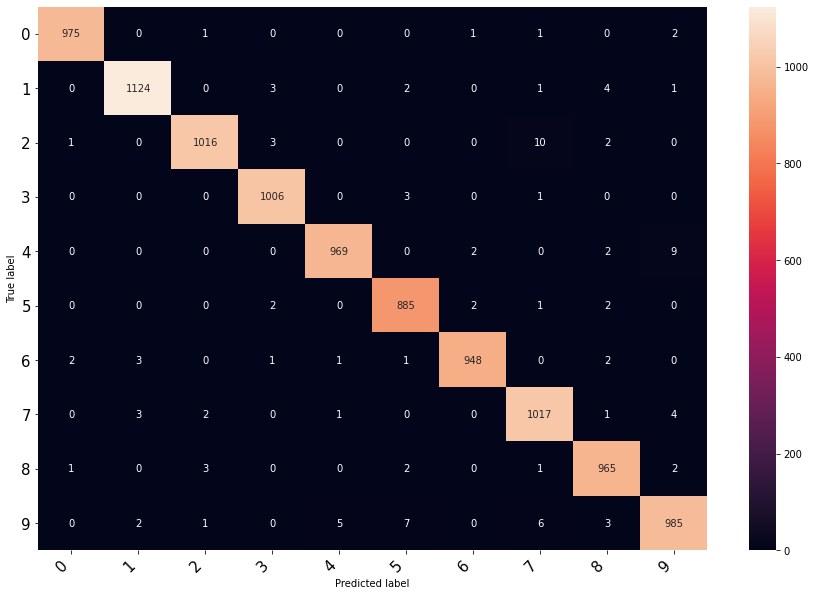

Accuracy is 98.90175718849841


In [208]:
print('Testing Model2 the Deep Learning network ...')
model2.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model1(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

Testing Model3 the Deep Learning network ...


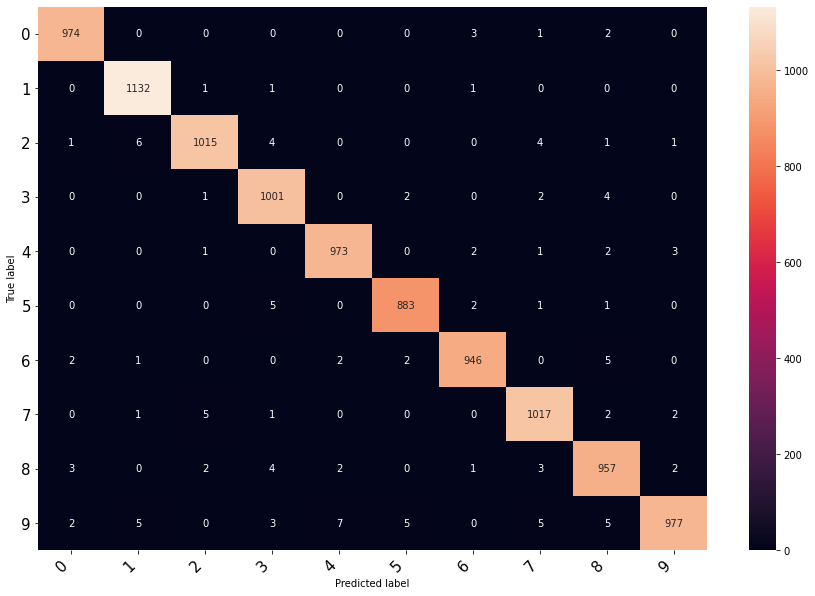

Accuracy is 98.75199680511182


In [209]:
print('Testing Model3 the Deep Learning network ...')
model3.eval()
accuracy=0
acc=[]
#predlist_test=torch.zeros(0,dtype=torch.long, device='cpu')
#lbllist_test=torch.zeros(0,dtype=torch.long, device='cpu')
confusion_matrix1 = torch.zeros(10,10)
for i,(batch_X,batch_Y) in enumerate(test_loader):
    X = Variable(batch_X)    
    Y = Variable(batch_Y)
    prediction=model3(X)
    _, preds = torch.max(prediction, 1)
    for t, p in zip(Y.view(-1), preds.view(-1)):
            confusion_matrix1[t.long(), p.long()] += 1
    correct_prediction = (torch.max(prediction.data, dim=1)[1] == Y.data)
    accuracy = correct_prediction.float().mean().item()
    acc.append(accuracy)
plt.figure(figsize=(15,10))

class_names = ["0","1","2","3","4","5","6","7","8","9"]
df_cm = pd.DataFrame(confusion_matrix1, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print("Accuracy is", (sum(acc)/len(acc))*100)
    

REFERENCES:-

www.pytorch.org/docs/stable/generated/torch.nn.Dropout.html



This Notebook is continuation is baseline.ipynb

We have added different dropout values in the CNN model.
So, we trained the CNN model for 3 different dropout values:-

The Accuracy for Dropout Value 0.25 is 98.89

The Accuracy for Dropout Value 0.50 is 98.9

The Accuracy for Dropout Value 0.75 is 98.75(For p=0.75, the accuracy was less for learning rate 0.05, so we changed the learning  rate to 0.001 for increasing accuracy)